<span style="color: purple;">**СРАВНЕНИЕ МОДЕЛЕЙ МАШИННОГО ОБУЧЕНИЯ ДЛЯ ПРОГНОЗИРОВАНИЯ ЦЕН АКЦИЙ**</span>

Машинное обучение – это направление искусственного интеллекта, которое позволяет компьютерам учиться решать задачи на основе опыта, не будучи явно запрограммированными для каждой конкретной ситуации. Сегодня машинное обучение – не только предмет исследований в области компьютерных наук, оно играет важную роль во многих сферах экономики, а также в нашей повседневной жизни, в том числе алгоритмы машинного обучения активно применяются в сфере торговли на фондовом рынке.

В данном итоговом проекте рассмотрим тему: «Сравнение моделей машинного обучения для прогнозирования цен акций». Цель проекта: сравнение моделей машинного обучения для прогнозирования цен акций и определение модели, которая будет обладать высокой обобщающей способностью, то есть будет давать достаточно точные предсказания на новых, ранее не встречавшихся данных. Задачи проекта: исследование данных о фондовом рынке, разработка моделей с использованием различных алгоритмов машинного обучения, сравнительный анализ моделей, демонстрация навыков создания программного кода на языке Python с применением различных библиотек, придерживаясь единого стиля оформления (PEP 8).



<span style="color: orange;">**1. Проведение исследовательского анализа данных (Exploratory Data Analysis - EDA).**</span>

Импортируем библиотеки для подсчета времени обучения модели, работы с массивами данных, выполнения математических операций, обработки и анализа структурированных табличных данных, визуализации данных, кодирования категориальных переменных, проведения теста Дика-Фуллера, реализации модели ARIMA, разделения данных на тренировочную и тестовую выборки, настройки гиперпараметров модели, стандартизации данных, реализации модели линейной регрессии, реализации модели случайного леса для регрессии, создания ансамбля моделей, оценки качества модели, реализации модели градиентного бустинга для регрессии.

In [1]:
from time import perf_counter

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

In [3]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [4]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [6]:
import lightgbm as lgb

Загружаем данные из csv-файла. Прописывается путь, где размещен файл с данными, затем с помощью функции pd.read_csv() выполняется чтение данных из csv-файла. Используется функция display() вместо print() для более удобного отображения таблицы.

In [7]:
DATASET = r'C:\Users\Алла\Desktop\Final_Project\stock_details_5_years.csv'

data = pd.read_csv(DATASET)

display(data)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA
...,...,...,...,...,...,...,...,...,...
602957,2023-11-29 00:00:00-05:00,26.360001,26.397499,26.120001,26.150000,1729147,0.00,0.0,PPL
602958,2023-11-29 00:00:00-05:00,27.680000,28.535000,27.680000,28.350000,1940066,0.00,0.0,FITB
602959,2023-11-29 00:00:00-05:00,75.940002,76.555000,75.257500,75.610001,298699,0.00,0.0,IFF
602960,2023-11-29 00:00:00-05:00,45.230000,45.259998,44.040001,44.209999,2217579,0.00,0.0,CCJ


Набор данных взят с сайта www.kaggle.com и содержит исторические данные о фондовом рынке, извлеченные из Yahoo Finance. Набор данных включает следующие столбцы: «Date» – дата, соответствующая зафиксированным данным фондового рынка; «Open» – цена открытия торгов акциями на определенную дату; «High» – максимальная цена акции, зафиксированная в течение торгового дня; «Low» – минимальная цена акции, зафиксированная в течение торгового дня; «Close» – цена закрытия торгов акциями на определенную дату; «Volume» – объем акций, проданных в определенную дату; «Dividends» – дивидендные выплаты, произведенные компанией на определенную дату; «Stock Splits» – информация о дроблении акций, произошедшем в определенную дату; «Company» – краткое буквенное обозначение компании. Набор данных содержит 602 962 строки и 9 столбцов.

С помощью метода info() выводим краткую оценку структуры и качества набора данных: количество строк и столбцов, названия и тип данных столбцов, количество ненулевых значений в столбцах, общее использование памяти. Данный метод удобен тем, что собирает в единое целое краткую информацию о наборе данных.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602962 entries, 0 to 602961
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          602962 non-null  object 
 1   Open          602962 non-null  float64
 2   High          602962 non-null  float64
 3   Low           602962 non-null  float64
 4   Close         602962 non-null  float64
 5   Volume        602962 non-null  int64  
 6   Dividends     602962 non-null  float64
 7   Stock Splits  602962 non-null  float64
 8   Company       602962 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 41.4+ MB


С помощью метода describe() выводим статистические характеристики числовых столбцов: количество заполненных строк в каждом столбце; среднее значение; стандартное отклонение, показывающее разброс значений; минимальное и максимальное значения; значения по процентилям, показывающие распределение значений в выборке. 25-й процентиль (первый квартиль) показывает нижнюю границу средней половины данных, то есть 25% значений находятся ниже. 50-й процентиль (медиана) делит данные пополам и является мерой центральной тенденции. 75% процентиль (третий квартиль) показывает верхнюю границу средней половины данных, то есть 75% значений находятся ниже. 

In [9]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,602962.000000,602962.000000,602962.000000,602962.000000,6.029620e+05,602962.00000,602962.000000
mean,140.074711,141.853492,138.276316,140.095204,5.895601e+06,0.00731,0.000344
std,275.401725,279.003191,271.895276,275.477969,1.381596e+07,0.12057,0.050607
min,1.052425,1.061195,1.026114,1.034884,0.000000e+00,0.00000,0.000000
25%,39.566159,40.056222,39.058151,39.563746,1.031500e+06,0.00000,0.000000
50%,79.177964,80.125563,78.193820,79.177906,2.228700e+06,0.00000,0.000000
75%,157.837190,159.746317,155.841609,157.847153,5.277400e+06,0.00000,0.000000
max,6490.259766,6525.000000,6405.000000,6509.350098,1.123003e+09,35.00000,20.000000


Округляем статистические характеристики до целых чисел.

In [10]:
with pd.option_context('display.float_format', '{:.0f}'.format):
    display(data.describe())

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,602962,602962,602962,602962,602962,602962,602962
mean,140,142,138,140,5895601,0,0
std,275,279,272,275,13815962,0,0
min,1,1,1,1,0,0,0
25%,40,40,39,40,1031500,0,0
50%,79,80,78,79,2228700,0,0
75%,158,160,156,158,5277400,0,0
max,6490,6525,6405,6509,1123003300,35,20


В наборе данных содержится информация по акциям 491 компании. Для вывода всех компаний и подсчета их количества используем методы unique() и nunique().

In [11]:
unique_values_company = data['Company'].unique()
print("Перечень компаний:", unique_values_company)

Перечень компаний: ['AAPL' 'MSFT' 'GOOGL' 'AMZN' 'NVDA' 'META' 'TSLA' 'LLY' 'V' 'TSM' 'UNH'
 'AVGO' 'NVO' 'JPM' 'WMT' 'XOM' 'MA' 'JNJ' 'PG' 'ORCL' 'HD' 'ADBE' 'ASML'
 'CVX' 'COST' 'TM' 'MRK' 'KO' 'ABBV' 'BAC' 'PEP' 'FMX' 'CRM' 'SHEL' 'ACN'
 'NFLX' 'MCD' 'AMD' 'LIN' 'NVS' 'AZN' 'CSCO' 'TMO' 'BABA' 'INTC' 'PDD'
 'SAP' 'ABT' 'TMUS' 'PFE' 'DIS' 'NKE' 'CMCSA' 'DHR' 'INTU' 'TTE' 'WFC'
 'VZ' 'BHP' 'HDB' 'HSBC' 'PM' 'QCOM' 'IBM' 'AMGN' 'TXN' 'NOW' 'BA' 'COP'
 'UNP' 'BX' 'SPGI' 'UPS' 'GE' 'MS' 'HON' 'CAT' 'AMAT' 'BUD' 'AXP' 'RY'
 'NEE' 'UL' 'SNY' 'RTX' 'T' 'LOW' 'SBUX' 'RIO' 'TD' 'SYK' 'BLK' 'LMT' 'GS'
 'ELV' 'ISRG' 'BKNG' 'SONY' 'MDT' 'PLD' 'SCHW' 'DE' 'MUFG' 'BP' 'TJX'
 'BMY' 'PBR' 'MMC' 'MDLZ' 'AMT' 'PGR' 'LRCX' 'SHOP' 'ADP' 'EQNR' 'GILD'
 'CB' 'ADI' 'PANW' 'VRTX' 'ETN' 'UBS' 'CVS' 'C' 'REGN' 'KKR' 'MU' 'SNPS'
 'CI' 'MELI' 'BSX' 'ZTS' 'IBN' 'DEO' 'FI' 'CME' 'SO' 'EQIX' 'CDNS' 'KLAC'
 'SLB' 'MO' 'CNI' 'ENB' 'NTES' 'INFY' 'ITW' 'RELX' 'GSK' 'EOG' 'CNQ' 'BTI'
 'SHW' 'NOC' 'DUK' 'WDAY' 'BDX' 'AN

In [12]:
unique_count_company = data['Company'].nunique()
print(f"Количество компаний: {unique_count_company}")

Количество компаний: 491


Столбец «Date» с помощью метода astype(str) преобразуем в строковый тип данных, затем с помощью метода str.slice() извлекаем часть строки: год, месяц, день, указанные через дефис и с помощью метода to_datetime() преобразуем в тип данных для хранения дат.

In [13]:
data['Date'] = data['Date'].astype(str).str.slice(0, 10)
data['Date'] = pd.to_datetime(data['Date'])

display(data)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA
...,...,...,...,...,...,...,...,...,...
602957,2023-11-29,26.360001,26.397499,26.120001,26.150000,1729147,0.00,0.0,PPL
602958,2023-11-29,27.680000,28.535000,27.680000,28.350000,1940066,0.00,0.0,FITB
602959,2023-11-29,75.940002,76.555000,75.257500,75.610001,298699,0.00,0.0,IFF
602960,2023-11-29,45.230000,45.259998,44.040001,44.209999,2217579,0.00,0.0,CCJ


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602962 entries, 0 to 602961
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          602962 non-null  datetime64[ns]
 1   Open          602962 non-null  float64       
 2   High          602962 non-null  float64       
 3   Low           602962 non-null  float64       
 4   Close         602962 non-null  float64       
 5   Volume        602962 non-null  int64         
 6   Dividends     602962 non-null  float64       
 7   Stock Splits  602962 non-null  float64       
 8   Company       602962 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 41.4+ MB


Преобразовав с помощью pivot строки с указанием компаний в столбцы, выводим цену закрытия торгов по датам в виде нового датасета data_close. Такое преобразование позволяет понять, что по некоторым компаниям данные имеются не по всем датам. Методом isnull().sum() подсчитываем количество пропущенных значений. Затем полученную информацию преобразуем в DataFrame. Методом reset_index() преобразуем индекс в столбец. С помощью функции rename() переименовываем столбец с количеством пропущенных значений.

In [15]:
data_close = data.pivot(
    index='Date',
    columns='Company',
    values='Close'
)

display(data_close)

Company,A,AAPL,ABBV,ABEV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,XEL,XOM,XYL,YUM,ZBH,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-29,69.001251,43.083508,71.184914,3.631820,NaN,67.365654,28.379999,150.171722,249.089996,81.795799,...,147.668747,21.815151,44.753716,61.217907,67.074562,83.960030,107.434830,NaN,37.560001,89.673248
2018-11-30,69.753235,42.850754,74.636864,3.606481,NaN,68.092094,28.620001,153.388290,250.889999,83.988708,...,148.563202,21.545931,45.552742,61.558617,68.655006,84.289078,109.359970,NaN,39.259998,90.736526
2018-12-03,71.989975,44.348064,74.153923,3.648712,NaN,68.294380,28.389999,155.532669,255.259995,85.441521,...,150.137817,21.619356,45.978298,62.890438,68.015305,84.151978,108.817947,NaN,39.119999,90.446533
2018-12-04,70.293159,42.397247,71.691612,3.606481,NaN,65.747253,27.940001,153.099289,245.820007,82.636406,...,146.569305,20.493515,45.882774,61.504402,64.007759,82.881523,104.659248,NaN,37.209999,87.546684
2018-12-06,69.329056,41.924541,71.517448,3.522021,NaN,65.784035,27.750000,148.474899,250.630005,81.804947,...,145.441925,21.815151,46.212795,60.699108,62.869465,83.631004,105.519012,NaN,42.980000,87.392029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22,123.989998,191.309998,138.470001,2.760000,129.039993,102.699997,85.949997,333.130005,619.719971,182.669998,...,244.470001,31.990000,60.430000,104.010002,102.220001,128.332977,113.830002,63.830002,190.639999,179.350006
2023-11-24,126.620003,189.970001,138.669998,2.750000,128.369995,102.870003,86.599998,334.040009,619.429993,183.050003,...,244.279999,31.940001,60.520000,104.570000,103.260002,127.904991,113.430000,64.529999,193.089996,180.210007
2023-11-27,125.010002,189.789993,139.089996,2.760000,129.000000,102.709999,87.000000,332.429993,619.270020,183.770004,...,245.039993,31.620001,60.450001,103.959999,103.180000,127.690002,113.839996,65.550003,191.910004,178.789993


In [16]:
missing_values = data_close.isnull().sum()
print(missing_values)

Company
A         0
AAPL      0
ABBV      0
ABEV      0
ABNB    511
       ... 
YUM       0
ZBH       0
ZM       95
ZS        0
ZTS       0
Length: 491, dtype: int64


In [17]:
df_missing_values = pd.DataFrame(missing_values)
print(df_missing_values)

           0
Company     
A          0
AAPL       0
ABBV       0
ABEV       0
ABNB     511
...      ...
YUM        0
ZBH        0
ZM        95
ZS         0
ZTS        0

[491 rows x 1 columns]


In [18]:
df_missing_values = df_missing_values.reset_index()
print(df_missing_values)

    Company    0
0         A    0
1      AAPL    0
2      ABBV    0
3      ABEV    0
4      ABNB  511
..      ...  ...
486     YUM    0
487     ZBH    0
488      ZM   95
489      ZS    0
490     ZTS    0

[491 rows x 2 columns]


In [19]:
df_missing_values = df_missing_values.rename(
    columns={0: 'Count_missing_values'}
)

print(df_missing_values)

    Company  Count_missing_values
0         A                     0
1      AAPL                     0
2      ABBV                     0
3      ABEV                     0
4      ABNB                   511
..      ...                   ...
486     YUM                     0
487     ZBH                     0
488      ZM                    95
489      ZS                     0
490     ZTS                     0

[491 rows x 2 columns]


Таким образом, выводим перечень компаний с пропущенными значениями.

In [20]:
missing_values_company = df_missing_values[
    df_missing_values['Count_missing_values'] != 0
]

display(missing_values_company)

,Company,Count_missing_values
4,ABNB,511
19,ALC,88
38,ARM,1204
54,BEKE,428
67,BNTX,216
78,CARR,326
88,CEG,789
103,COIN,595
108,CPNG,572
113,CRWD,132


Пропущенные значения заменяем на «серединное» значение – медиану, используя функцию fillna(). Изменения применяем непосредственно к датасету data_close, поэтому указываем inplace=True. Медиана устойчива к выбросам, более подходит к асимметричным данным, уменьшает влияние экстремальных данных. Среднее же значение более подходит для нормально распределенных данных, а мода – для данных с явным преобладанием одного значения. Поэтому в данном случае целесообразно использовать медиану.

In [21]:
for i in data_close.columns:
    data_close[i] = data_close[i].fillna(data_close[i].median())

display(data_close)

Company,A,AAPL,ABBV,ABEV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,XEL,XOM,XYL,YUM,ZBH,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-29,69.001251,43.083508,71.184914,3.631820,137.210007,67.365654,28.379999,150.171722,249.089996,81.795799,...,147.668747,21.815151,44.753716,61.217907,67.074562,83.960030,107.434830,106.099998,37.560001,89.673248
2018-11-30,69.753235,42.850754,74.636864,3.606481,137.210007,68.092094,28.620001,153.388290,250.889999,83.988708,...,148.563202,21.545931,45.552742,61.558617,68.655006,84.289078,109.359970,106.099998,39.259998,90.736526
2018-12-03,71.989975,44.348064,74.153923,3.648712,137.210007,68.294380,28.389999,155.532669,255.259995,85.441521,...,150.137817,21.619356,45.978298,62.890438,68.015305,84.151978,108.817947,106.099998,39.119999,90.446533
2018-12-04,70.293159,42.397247,71.691612,3.606481,137.210007,65.747253,27.940001,153.099289,245.820007,82.636406,...,146.569305,20.493515,45.882774,61.504402,64.007759,82.881523,104.659248,106.099998,37.209999,87.546684
2018-12-06,69.329056,41.924541,71.517448,3.522021,137.210007,65.784035,27.750000,148.474899,250.630005,81.804947,...,145.441925,21.815151,46.212795,60.699108,62.869465,83.631004,105.519012,106.099998,42.980000,87.392029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22,123.989998,191.309998,138.470001,2.760000,129.039993,102.699997,85.949997,333.130005,619.719971,182.669998,...,244.470001,31.990000,60.430000,104.010002,102.220001,128.332977,113.830002,63.830002,190.639999,179.350006
2023-11-24,126.620003,189.970001,138.669998,2.750000,128.369995,102.870003,86.599998,334.040009,619.429993,183.050003,...,244.279999,31.940001,60.520000,104.570000,103.260002,127.904991,113.430000,64.529999,193.089996,180.210007
2023-11-27,125.010002,189.789993,139.089996,2.760000,129.000000,102.709999,87.000000,332.429993,619.270020,183.770004,...,245.039993,31.620001,60.450001,103.959999,103.180000,127.690002,113.839996,65.550003,191.910004,178.789993


Используя датасет data_close подсчитываем функцией mean() среднюю цену закрытия торгов по компаниям за весь период наблюдения и преобразовываем полученные данные в DataFrame. Среднее значение считается по каждому столбцу.

In [22]:
mean_close = data_close.mean(axis=0)

print(
    "Средняя цена закрытия торгов по компаниям "
    "за весь период наблюдения:\n",
    mean_close
)

Средняя цена закрытия торгов по компаниям за весь период наблюдения:
 Company
A       111.862449
AAPL    118.992628
ABBV    104.811102
ABEV      2.945837
ABNB    138.458842
           ...    
YUM     107.732138
ZBH     126.215307
ZM      168.821307
ZS      143.463382
ZTS     153.390256
Length: 491, dtype: float64


In [23]:
df_mean_close = pd.DataFrame(mean_close)
print(df_mean_close)

                  0
Company            
A        111.862449
AAPL     118.992628
ABBV     104.811102
ABEV       2.945837
ABNB     138.458842
...             ...
YUM      107.732138
ZBH      126.215307
ZM       168.821307
ZS       143.463382
ZTS      153.390256

[491 rows x 1 columns]


In [24]:
df_mean_close = df_mean_close.reset_index()
print(df_mean_close)

    Company           0
0         A  111.862449
1      AAPL  118.992628
2      ABBV  104.811102
3      ABEV    2.945837
4      ABNB  138.458842
..      ...         ...
486     YUM  107.732138
487     ZBH  126.215307
488      ZM  168.821307
489      ZS  143.463382
490     ZTS  153.390256

[491 rows x 2 columns]


In [25]:
df_mean_close = df_mean_close.rename(
    columns={0: 'Mean_Close'}
)

display(df_mean_close)

,Company,Mean_Close
0,A,111.862449
1,AAPL,118.992628
2,ABBV,104.811102
3,ABEV,2.945837
4,ABNB,138.458842
...,...,...
486,YUM,107.732138
487,ZBH,126.215307
488,ZM,168.821307
489,ZS,143.463382


In [26]:
df_mean_close.describe()

,Mean_Close
count,491.000000
mean,138.033386
std,260.781588
min,2.102599
25%,42.389239
50%,80.821562
75%,154.630123
max,4369.628335


Имеется существенный разброс в данных. Построим диаграмму рассеяния значений средней цены закрытия торгов по компаниям за весь период наблюдения. Используем функцию plt.scatter(). Настраиваем размеры и цвет, убираем наименования компаний для лучшей читаемости. Настраиваем параметры делений на осях: применяем настройки к обеим осям, выводим основные деления, задаем размер шрифта меток делений. Добавляем сетку и задаем автоматическую настройку расположения элементов диаграммы.

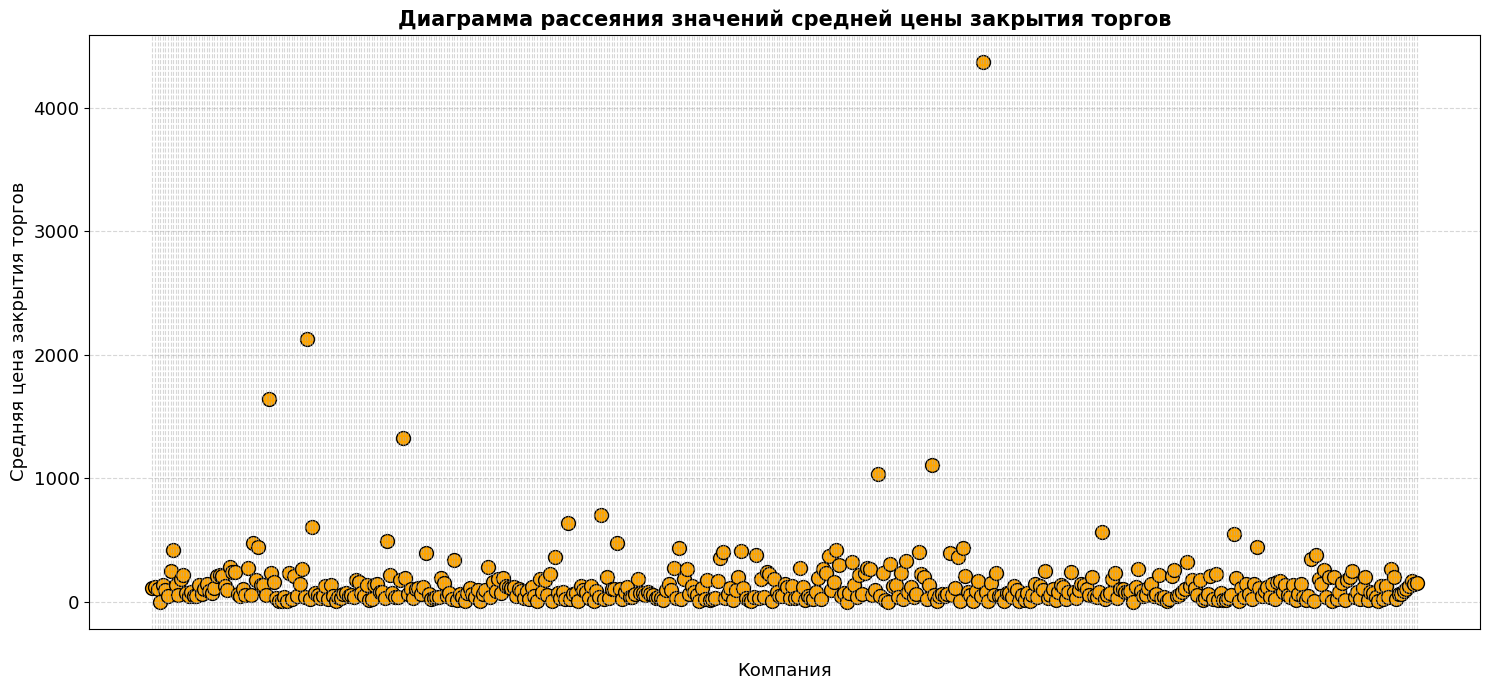

In [27]:
x = df_mean_close['Company']
y = df_mean_close['Mean_Close']

plt.figure(figsize=(15, 7))
plt.rc('xtick', color='white')
plt.tick_params(
    axis='both',
    which='major',
    labelsize=13
)

plt.scatter(
    x,
    y,
    color='orange',
    edgecolor='k',
    s=100
)

plt.xlabel("Компания", fontsize=13)
plt.ylabel("Средняя цена закрытия торгов", fontsize=13)
plt.title(
    "Диаграмма рассеяния значений средней цены закрытия торгов",
    fontsize=15,
    fontweight='bold'
)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

В данных есть несколько значений, существенно отклоняющихся от среднего значения.

Ориентируясь по графику, выводим перечень компаний, по которым наблюдается существенное отклонение от среднего значения в большую сторону.

In [28]:
max_mean_close = df_mean_close.loc[
    df_mean_close['Mean_Close'] > 1000
]

display(max_mean_close)

,Company,Mean_Close
45,AZO,1645.242242
60,BKNG,2126.469873
97,CMG,1324.551017
281,MELI,1032.793749
302,MTD,1107.243361
322,NVR,4369.628335


Для дальнейшего исследования и использования данных для разработки моделей прогнозирования необходимо преобразование столбца «Date». Выделяем в отдельные столбцы год, месяц, день с помощью атрибутов dt.year, dt.month, dt.day. 

In [29]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

display(data)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company,Year,Month,Day
0,2018-11-29,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL,2018,11,29
1,2018-11-29,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT,2018,11,29
2,2018-11-29,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL,2018,11,29
3,2018-11-29,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN,2018,11,29
4,2018-11-29,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA,2018,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
602957,2023-11-29,26.360001,26.397499,26.120001,26.150000,1729147,0.00,0.0,PPL,2023,11,29
602958,2023-11-29,27.680000,28.535000,27.680000,28.350000,1940066,0.00,0.0,FITB,2023,11,29
602959,2023-11-29,75.940002,76.555000,75.257500,75.610001,298699,0.00,0.0,IFF,2023,11,29
602960,2023-11-29,45.230000,45.259998,44.040001,44.209999,2217579,0.00,0.0,CCJ,2023,11,29


Визуализируем динамику изменения цены закрытия торгов за весь период наблюдения по выбранной компании, а также одновременно по трем компаниям для сравнительного анализа. Поскольку компаний достаточно много, смотреть на графике динамику одновременно по всем компаниям не совсем информативно, поэтому можно посмотреть динамику по одной или трем выбранным компаниям. Информацию с кратким буквенным обозначением компании необходимо ввести в поле для ввода данных Input. Оценив динамику изменения цены закрытия торгов, можно сделать предположение о том, является ли временной ряд стационарным или нет. Стационарный временной ряд не имеет явного тренда, значения колеблются вокруг одного уровня, нет резких подъемов или спадов. Определение является ли временной ряд стационарным или нет необходимо для построения ARIMA-модели.

Введите название компании:  LI


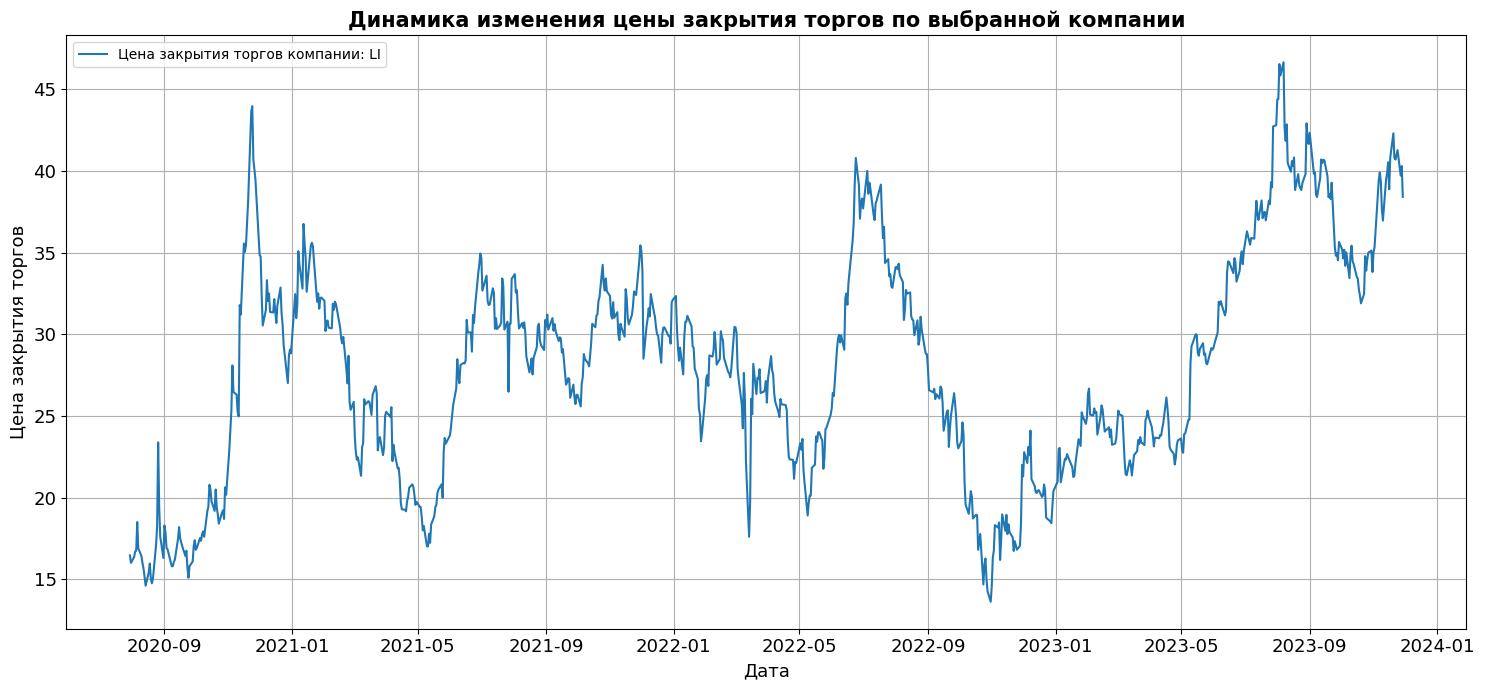

In [30]:
company = input(
    "Введите название компании: "
)

plt.figure(figsize=(15, 7))
plt.rc('xtick', color='black')
plt.tick_params(
    axis='both',
    which='major',
    labelsize=13
)

sns.lineplot(
    x='Date',
    y='Close',
    data=data[data['Company'] == company],
    label=f'Цена закрытия торгов компании: {company}'
)

plt.xlabel("Дата", fontsize=13)
plt.ylabel("Цена закрытия торгов", fontsize=13)
plt.title(
    "Динамика изменения цены закрытия торгов по выбранной компании",
    fontsize=15,
    fontweight='bold'
)

plt.legend(loc='best', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

Введите название компании:  A
Введите название компании:  LI
Введите название компании:  CCJ


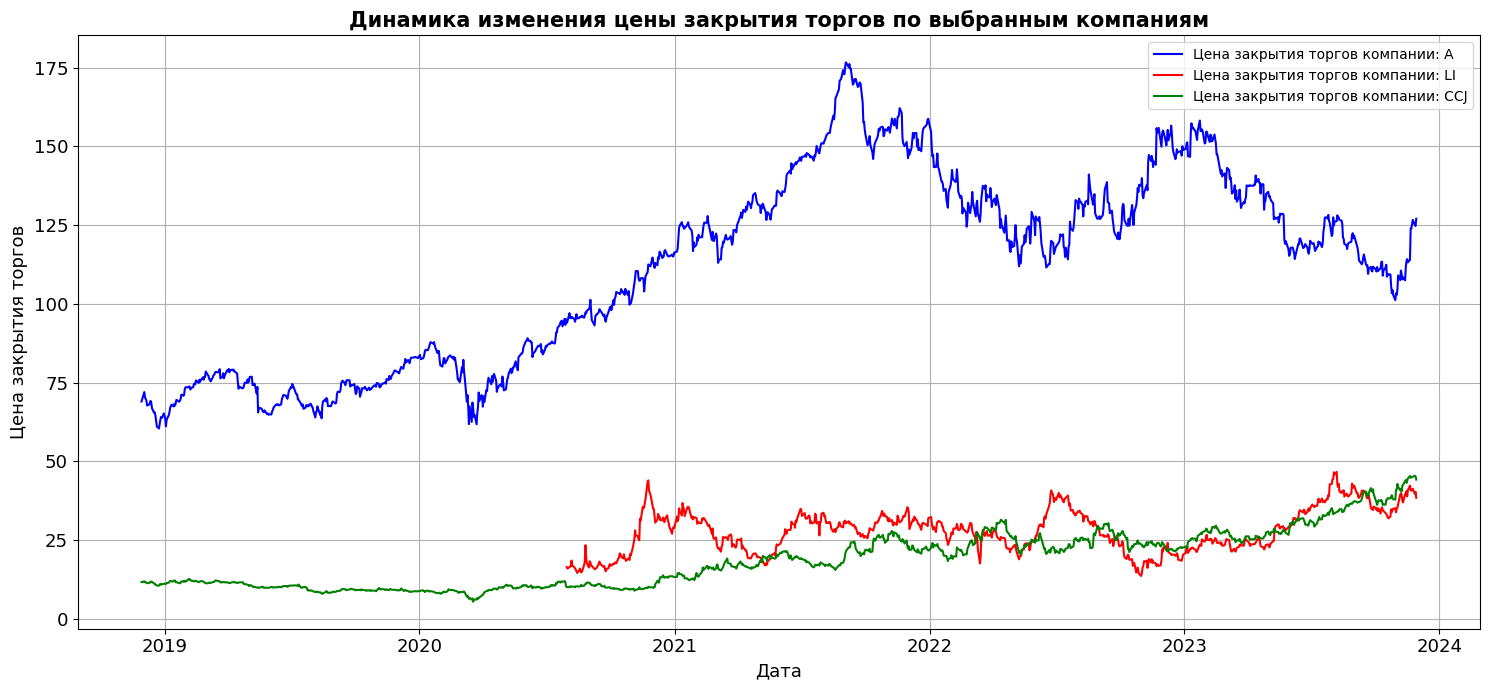

In [31]:
company_1 = input(
    "Введите название компании: "
)
company_2 = input(
    "Введите название компании: "
)
company_3 = input(
    "Введите название компании: "
)

plt.figure(figsize=(15, 7))
plt.rc('xtick', color='black')
plt.tick_params(
    axis='both',
    which='major',
    labelsize=13
)

sns.lineplot(
    x='Date',
    y='Close',
    data=data[data['Company'] == company_1],
    label=f'Цена закрытия торгов компании: {company_1}',
    color="b"
)

sns.lineplot(
    x='Date',
    y='Close',
    data=data[data['Company'] == company_2],
    label=f'Цена закрытия торгов компании: {company_2}',
    color="r"
)

sns.lineplot(
    x='Date',
    y='Close',
    data=data[data['Company'] == company_3],
    label=f'Цена закрытия торгов компании: {company_3}',
    color="g"
)

plt.xlabel("Дата", fontsize=13)
plt.ylabel("Цена закрытия торгов", fontsize=13)
plt.title(
    "Динамика изменения цены закрытия торгов по выбранным компаниям",
    fontsize=15,
    fontweight='bold'
)

plt.legend(loc='best', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

Выше представленный код можно оптимизировать, применив циклы.

Введите название компании 1:  A
Введите название компании 2:  LI
Введите название компании 3:  CCJ


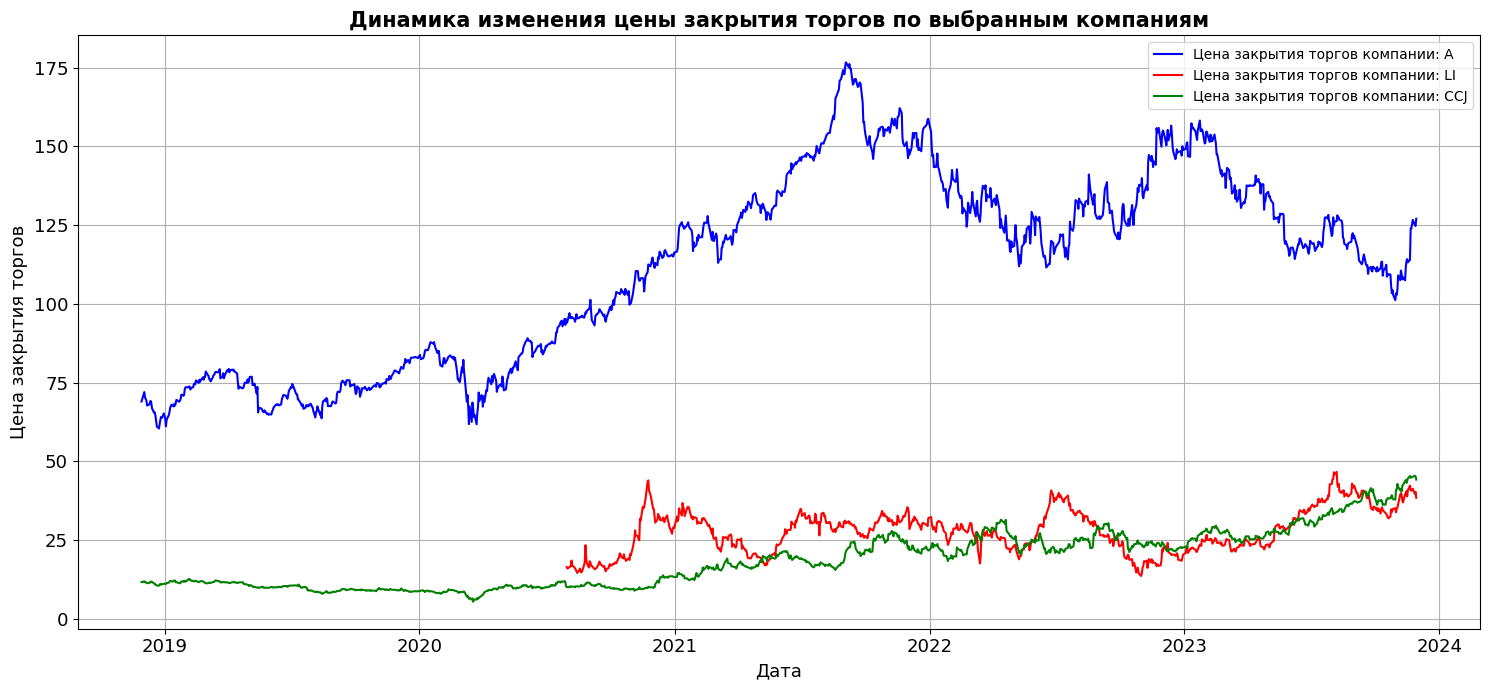

In [32]:
companies = []
for i in range(1, 4):
    company_name = input(f"Введите название компании {i}: ")
    companies.append(company_name)

plt.figure(figsize=(15, 7))
plt.rc('xtick', color='black')
plt.tick_params(
    axis='both',
    which='major',
    labelsize=13
)

colors = ["b", "r", "g"]

for company, color in zip(companies, colors):
    sns.lineplot(
        x='Date',
        y='Close',
        data=data[data['Company'] == company],
        label=f'Цена закрытия торгов компании: {company}',
        color=color
    )

plt.xlabel("Дата", fontsize=13)
plt.ylabel("Цена закрытия торгов", fontsize=13)
plt.title(
    "Динамика изменения цены закрытия торгов по выбранным компаниям",
    fontsize=15,
    fontweight='bold'
)

plt.legend(loc='best', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

Удаляем ранее преобразованный столбец «Date» функцией drop().

In [33]:
data_new = data.drop(['Date'], axis=1)

display(data_new)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company,Year,Month,Day
0,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL,2018,11,29
1,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT,2018,11,29
2,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL,2018,11,29
3,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN,2018,11,29
4,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA,2018,11,29
...,...,...,...,...,...,...,...,...,...,...,...
602957,26.360001,26.397499,26.120001,26.150000,1729147,0.00,0.0,PPL,2023,11,29
602958,27.680000,28.535000,27.680000,28.350000,1940066,0.00,0.0,FITB,2023,11,29
602959,75.940002,76.555000,75.257500,75.610001,298699,0.00,0.0,IFF,2023,11,29
602960,45.230000,45.259998,44.040001,44.209999,2217579,0.00,0.0,CCJ,2023,11,29


Выводим среднюю по годам цену закрытия торгов по компаниям. Находим среднее значение столбца «Close» для каждой комбинации значений столбцов «Company» и «Year»: groupby(['Company', 'Year'])['Close'].mean(). Затем полученные результаты преобразуем в DataFrame и выводим график с динамикой изменения средней по годам цены закрытия торгов за весь период наблюдений по всем компаниям для визуализации разброса динамики средней цены закрытия торгов. Добавляем на график метки с названиями компаний.

In [34]:
year_close = data_new.groupby(['Company', 'Year'])['Close'].mean()

print(
    "Средняя по годам цена закрытия торгов по компаниям:\n",
    year_close
)

Средняя по годам цена закрытия торгов по компаниям:
 Company  Year
A        2018     66.438090
         2019     72.929442
         2020     90.516794
         2021    142.471051
         2022    131.681523
                    ...    
ZTS      2019    107.136584
         2020    141.352767
         2021    185.217927
         2022    169.156711
         2023    171.615852
Name: Close, Length: 2874, dtype: float64


In [35]:
df_year_close = pd.DataFrame(year_close)
print(df_year_close)

                   Close
Company Year            
A       2018   66.438090
        2019   72.929442
        2020   90.516794
        2021  142.471051
        2022  131.681523
...                  ...
ZTS     2019  107.136584
        2020  141.352767
        2021  185.217927
        2022  169.156711
        2023  171.615852

[2874 rows x 1 columns]


In [36]:
df_year_close = df_year_close.reset_index()
display(df_year_close)

,Company,Year,Close
0,A,2018,66.438090
1,A,2019,72.929442
2,A,2020,90.516794
3,A,2021,142.471051
4,A,2022,131.681523
...,...,...,...
2869,ZTS,2019,107.136584
2870,ZTS,2020,141.352767
2871,ZTS,2021,185.217927
2872,ZTS,2022,169.156711


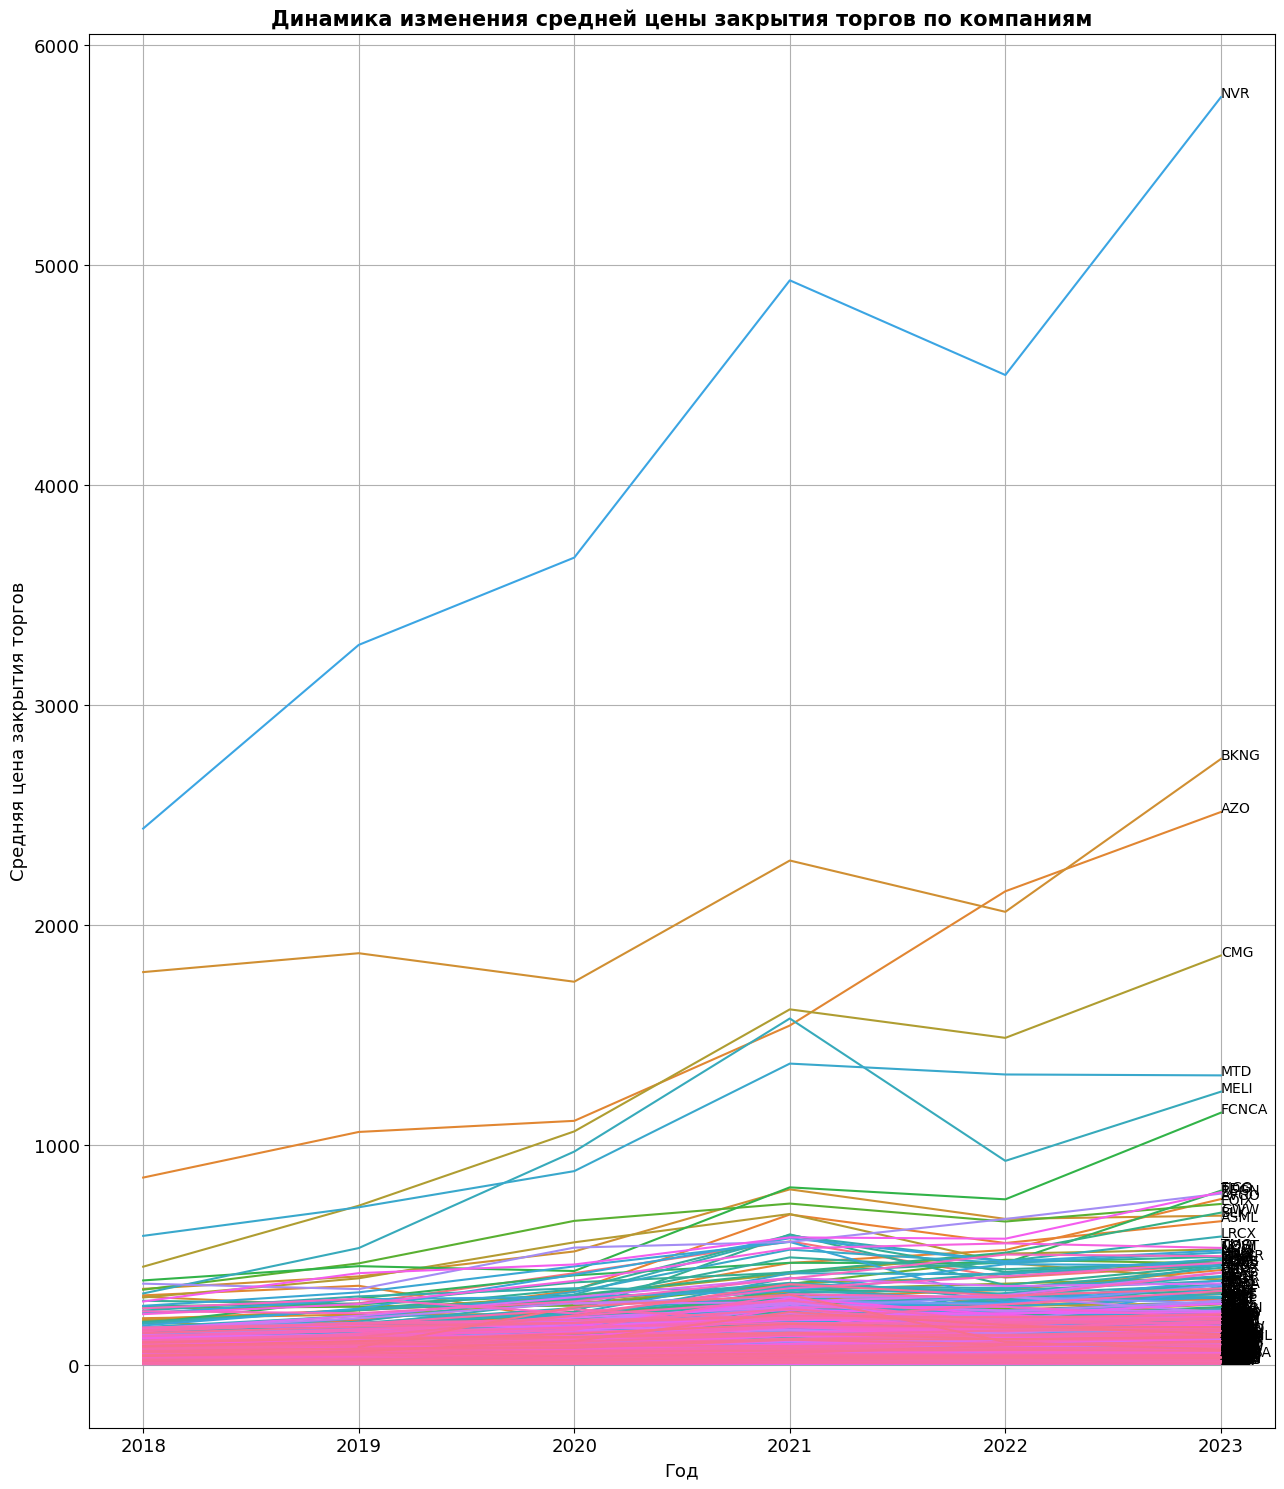

In [37]:
plt.figure(figsize=(13, 15))
plt.rc('xtick', color='black')
plt.tick_params(
    axis='both',
    which='major',
    labelsize=13
)

ax = sns.lineplot(
    data=df_year_close,
    x='Year',
    y='Close',
    hue='Company',
    legend=None
)

for company in df_year_close['Company'].unique():
    company_data = df_year_close[df_year_close['Company'] == company]

    last_year = company_data['Year'].max()
    last_close = company_data[
        company_data['Year'] == last_year
        ]['Close'].values[0]

    ax.annotate(company, (last_year, last_close))

plt.xlabel("Год", fontsize=13)
plt.ylabel("Средняя цена закрытия торгов", fontsize=13)
plt.title(
    "Динамика изменения средней цены закрытия торгов по компаниям",
    fontsize=15,
    fontweight='bold'
)

plt.grid(True)
plt.tight_layout()
plt.show()

Столбец «Company» имеет тип данных object. Для дальнейшего исследования данных и использования данных для разработки моделей прогнозирования необходимо преобразование столбца «Company». Данные не имеют естественного порядка, но содержат большое количество уникальных значений, поэтому для преобразования категориальной переменной в данном случае используем метод Target Encoding. Target Encoding в отличие от One Hot Encoding не создает множество новых столбцов, что позволяет экономить время обучения модели.

In [38]:
encoder = ce.TargetEncoder(cols=['Company'])

data_result_1 = encoder.fit_transform(
    data_new,
    data_new['Company']
)

display(data_result_1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company,Year,Month,Day
0,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,1.0,2018,11,29
1,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,298.0,2018,11,29
2,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,199.0,2018,11,29
3,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,28.0,2018,11,29
4,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,320.0,2018,11,29
...,...,...,...,...,...,...,...,...,...,...,...
602957,26.360001,26.397499,26.120001,26.150000,1729147,0.00,0.0,354.0,2023,11,29
602958,27.680000,28.535000,27.680000,28.350000,1940066,0.00,0.0,182.0,2023,11,29
602959,75.940002,76.555000,75.257500,75.610001,298699,0.00,0.0,229.0,2023,11,29
602960,45.230000,45.259998,44.040001,44.209999,2217579,0.00,0.0,84.0,2023,11,29


In [39]:
data_result_1.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
Company         float64
Year              int32
Month             int32
Day               int32
dtype: object

Создаем матрицу корреляции и визуализируем результат в виде тепловой карты. Добавляем числовые значения с двумя знаками после запятой в каждую ячейку тепловой карты. По результатам видно, что максимальная корреляция присутствует между ценой открытия торгов, ценой закрытия торгов, а также колебаниями в течение дня. Предположительно в наборе данных присутствуют избыточные признаки, которые могут ухудшать качество и увеличивать скоростью обучения модели. Данная гипотеза будет проверена в процесс разработки моделей машинного обучения с использованием различных алгоритмов и различных комбинаций признаков.

In [40]:
numeric_data = data_result_1.select_dtypes(
    include=[
        'float64',
        'int64',
        'int32']
)

correlation_matrix = numeric_data.corr()

display(correlation_matrix)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company,Year,Month,Day
Open,1.000000,0.999910,0.999898,0.999807,-0.096096,0.009417,-0.001256,-0.037197,0.087829,0.012013,-0.000206
High,0.999910,1.000000,0.999868,0.999907,-0.095561,0.009310,-0.001234,-0.037034,0.087802,0.011525,-0.000345
Low,0.999898,0.999868,1.000000,0.999911,-0.096634,0.009484,-0.001278,-0.037356,0.087945,0.012402,-0.000014
Close,0.999807,0.999907,0.999911,1.000000,-0.096093,0.009396,-0.001259,-0.037204,0.087868,0.011861,-0.000219
Volume,-0.096096,-0.095561,-0.096634,-0.096093,1.000000,-0.008840,0.016015,-0.021194,-0.002585,-0.027505,-0.000635
Dividends,0.009417,0.009310,0.009484,0.009396,-0.008840,1.000000,0.001282,-0.001697,0.005146,0.005507,0.001983
Stock Splits,-0.001256,-0.001234,-0.001278,-0.001259,0.016015,0.001282,1.000000,-0.001350,0.001198,0.000255,0.000166
Company,-0.037197,-0.037034,-0.037356,-0.037204,-0.021194,-0.001697,-0.001350,1.000000,-0.003952,-0.000198,-0.000059
Year,0.087829,0.087802,0.087945,0.087868,-0.002585,0.005146,0.001198,-0.003952,1.000000,-0.092116,-0.006801
Month,0.012013,0.011525,0.012402,0.011861,-0.027505,0.005507,0.000255,-0.000198,-0.092116,1.000000,0.003762


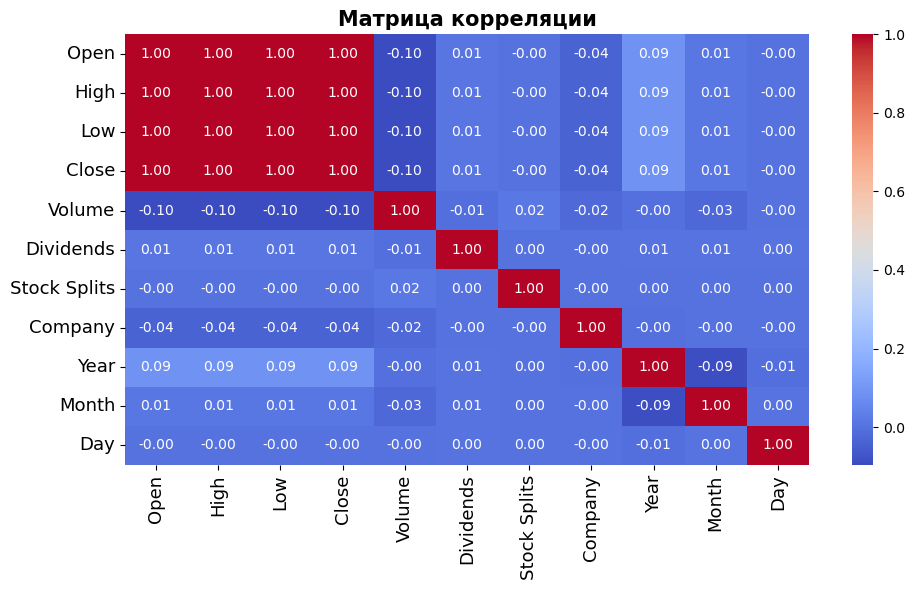

In [41]:
plt.figure(figsize=(10, 6))
plt.rc('xtick', color='black')
plt.tick_params(
    axis='both',
    which='major',
    labelsize=13
)

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)

plt.title(
    "Матрица корреляции",
    fontsize=15,
    fontweight='bold'
)

plt.tight_layout()
plt.show()

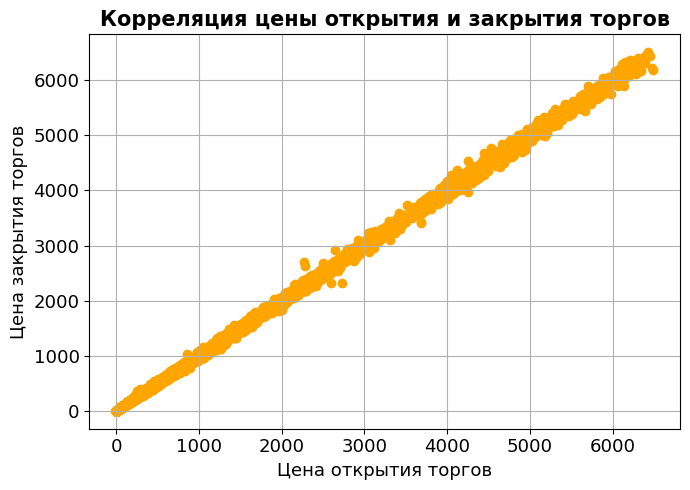

In [42]:
x = data['Open']
y = data['Close']

plt.figure(figsize=(7, 5))
plt.rc('xtick', color='black')
plt.tick_params(
    axis='both',
    which='major',
    labelsize=13
)

plt.scatter(x, y, color='orange')
plt.xlabel("Цена открытия торгов", fontsize=13)
plt.ylabel("Цена закрытия торгов", fontsize=13)
plt.title(
    "Корреляция цены открытия и закрытия торгов",
    fontsize=15,
    fontweight='bold'
)

plt.grid(True)
plt.tight_layout()
plt.show()

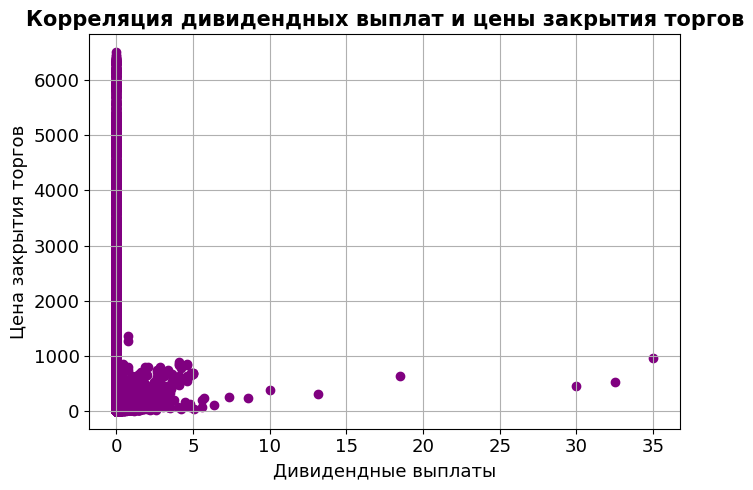

In [43]:
x = data['Dividends']
y = data['Close']

plt.figure(figsize=(7, 5))
plt.rc('xtick', color='black')
plt.tick_params(
    axis='both',
    which='major',
    labelsize=13
)

plt.scatter(x, y, color='purple')
plt.xlabel("Дивидендные выплаты", fontsize=13)
plt.ylabel("Цена закрытия торгов", fontsize=13)
plt.title(
    "Корреляция дивидендных выплат и цены закрытия торгов",
    fontsize=15,
    fontweight='bold'
)

plt.grid(True)
plt.tight_layout()
plt.show()

В процессе исследовательского анализа данных удалось изучить состав и структуру набора данных. Выявлены компании, по которым данные собраны не по всем датам, недостающие значения заменены на медиану для более точного анализа и визуализации данных. Выявлены компании с наиболее высокой средней ценой закрытия торгов. Благодаря визуализации динамики изменения цены закрытия торгов можно сделать предположение о том, является ли временной ряд стационарным или нет. Данная информация может быть полезна в разработке системы управления рисками и в создании индивидуальных инвестиционных стратегий. Сформирована матрица корреляции, позволяющая выявить наиболее важные признаки, что в дальнейшем будет использовано в процессе разработки моделей прогнозирования. Возможно предположение, что в наборе данных присутствуют избыточные признаки, которые могут ухудшать качество и увеличивать время обучения модели. Данная гипотеза будет проверена далее в процессе разработки моделей. Для дальнейшего использования данных с целью разработки моделей прогнозирования преобразованы нечисловые столбцы с датой и кратким буквенным обозначением компании.

<span style="color: orange;">**2. Разработка статистической модели ARIMA для анализа и прогнозирования временных рядов.**</span>

Модель ARIMA – статистическая модель для анализа и прогнозирования временных рядов. Она объединяет три основных компонента: авторегрессия, интегрирование, скользящее среднее. Авторегрессия использует прошлые значения временного ряда для предсказания будущих. Интегрирование делает временной ряд стационарным путем взятия разностей. Скользящее среднее учитывает прошлые ошибки прогноза. Компоненты модели: порядок авторегрессии (p) – количество предыдущих значений, используемых для прогнозирования; порядок интегрирования (d) – количество разностей, необходимых для достижения стационарности; порядок скользящего среднего (q) – количество прошлых ошибок, используемых в модели. 

ARIMA хорошо работает с временными рядами, но требует стационарности временного ряда. Стационарный временной ряд – это ряд, статистические свойства которого не меняются во времени, то есть среднее значение и дисперсия постоянны. Помимо визуального определения по графику для проверки стационарности временного ряда требуется проводить тест Дики-Фуллера.

In [44]:
def perform_adf_test(series):
    result = adfuller(series)
    return {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Value (1%)': result[4]['1%'],
        'Critical Value (5%)': result[4]['5%'],
        'Critical Value (10%)': result[4]['10%']
    }


adf_results = {}

for company in data_close.columns:
    try:
        prices = data_close[company]

        result = perform_adf_test(prices)

        adf_results[company] = result

        print(f"Результаты для {company}:")
        print(f"ADF Statistic: {result['ADF Statistic']}")
        print(f"p-value: {result['p-value']}")
        print(f"Критические значения:")
        print(f"  1%: {result['Critical Value (1%)']}")
        print(f"  5%: {result['Critical Value (5%)']}")
        print(f"  10%: {result['Critical Value (10%)']}")
        print("-" * 40)

    except Exception as e:
        print(f"Ошибка при обработке {company}: {str(e)}")


df_adf_result = pd.DataFrame(adf_results).T

Результаты для A:
ADF Statistic: -1.5301005427431957
p-value: 0.5185719832515249
Критические значения:
  1%: -3.4355880246374304
  5%: -2.8638531175675896
  10%: -2.568001531098063
----------------------------------------
Результаты для AAPL:
ADF Statistic: -0.9835736053356359
p-value: 0.759208205604656
Критические значения:
  1%: -3.4355629707955395
  5%: -2.863842063387667
  10%: -2.567995644141416
----------------------------------------
Результаты для ABBV:
ADF Statistic: -0.923762303375191
p-value: 0.7800464721280467
Критические значения:
  1%: -3.4356048614183443
  5%: -2.8638605461891617
  10%: -2.5680054872544145
----------------------------------------
Результаты для ABEV:
ADF Statistic: -2.1319383010431414
p-value: 0.23186744328768422
Критические значения:
  1%: -3.435571295403709
  5%: -2.863845736356174
  10%: -2.567997600196822
----------------------------------------
Результаты для ABNB:
ADF Statistic: -2.4717312564646683
p-value: 0.12250477716904523
Критические значения:

Результаты теста Дики-Фуллера представлены в таблице.

In [45]:
display(df_adf_result)

,ADF Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%)
A,-1.530101,0.518572,-3.435588,-2.863853,-2.568002
AAPL,-0.983574,0.759208,-3.435563,-2.863842,-2.567996
ABBV,-0.923762,0.780046,-3.435605,-2.863861,-2.568005
ABEV,-2.131938,0.231867,-3.435571,-2.863846,-2.567998
ABNB,-2.471731,0.122505,-3.435613,-2.863864,-2.568007
...,...,...,...,...,...
YUM,-1.694259,0.434073,-3.435563,-2.863842,-2.567996
ZBH,-2.973498,0.037445,-3.435592,-2.863855,-2.568003
ZM,-1.480750,0.543011,-3.435652,-2.863881,-2.568016
ZS,-1.583503,0.491875,-3.435605,-2.863861,-2.568005


Временной ряд можно считать стационарным, если ADF Statistic (статистика Дики-Фуллера) < критического значения и p-value (уровень значимости) < 0.05. Для построения ARIMA-модели будем использовать компании со стационарным временным рядом.

In [46]:
stationary = df_adf_result[
    (df_adf_result['ADF Statistic'] < df_adf_result['Critical Value (10%)']) &
    (df_adf_result['p-value'] < 0.05)
]
display(stationary)

,ADF Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%)
AEP,-2.869192,4.904963e-02,-3.435618,-2.863866,-2.568008
ARM,-14.629387,3.773319e-27,-3.435660,-2.863885,-2.568019
BDX,-3.818669,2.721976e-03,-3.435605,-2.863861,-2.568005
BIIB,-3.090076,2.729637e-02,-3.435588,-2.863853,-2.568002
ETR,-3.343287,1.305099e-02,-3.435639,-2.863876,-2.568013
FTV,-2.879900,4.773579e-02,-3.435605,-2.863861,-2.568005
GEHC,-3.721085,3.826166e-03,-3.435660,-2.863885,-2.568019
GFS,-6.352162,2.594891e-08,-3.435639,-2.863876,-2.568013
HLN,-2.985156,3.630412e-02,-3.435652,-2.863881,-2.568016
KMB,-3.519781,7.493376e-03,-3.435601,-2.863859,-2.568004


Подбираем оптимальные компоненты модели, создаем модель на основе лучших найденных значений, выводим визуализацию и метрики оценки качества модели.

In [47]:
import itertools
import warnings
warnings.filterwarnings("ignore")

company = input("Введите название компании: ")

series = data_close[company]

train_size = int(len(series) * 0.8)
train_close, test_close = series[:train_size], series[train_size:]

p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

param_grid = list(itertools.product(
    p_values,
    d_values,
    q_values
)
                 )


def evaluate_arima_model(X, arima_order):
    try:
        model = ARIMA(X, order=arima_order)
        model_fit = model.fit()

        predictions = model_fit.forecast(
            steps=len(test_close)
        )

        error = mean_squared_error(
            test_close,
            predictions
        )
        return error
    except Exception:
        return None


results = {}

for param in param_grid:
    try:
        error = evaluate_arima_model(
            train_close,
            param
        )
        if error is not None:
            results[param] = error
    except Exception:
        continue

if results:
    best_params = min(results, key=results.get)
    print(f'\nЛучшие компоненты: ARIMA{best_params}')
else:
    print("Не удалось найти подходящие параметры модели")

Введите название компании:  LI



Лучшие компоненты: ARIMA(1, 0, 2)


In [48]:
train_close, test_close = train_test_split(
    data_close,
    test_size=0.3,
    shuffle=False
)

In [49]:
p, d, q = 1, 0, 2
arima = sm.tsa.ARIMA(train_close[company], order=(p, d, q))
model_arima = arima.fit()

In [50]:
display(model_arima)

In [51]:
forecast = model_arima.forecast(
    steps=test_close.shape[0]
)

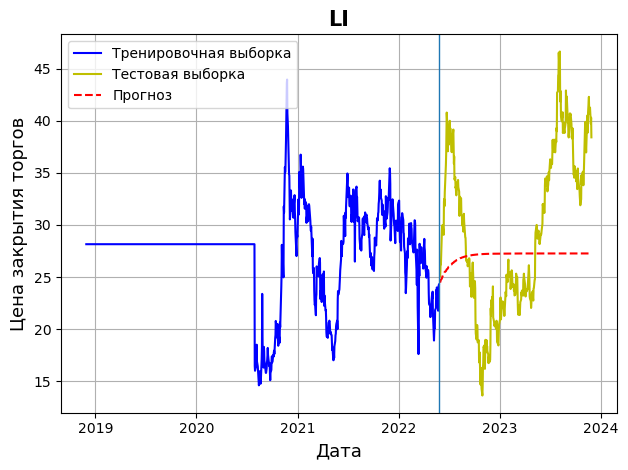

In [52]:
plt.rc('xtick', color='black')

plt.plot(
    pd.to_datetime(train_close.index).values.reshape(-1, 1),
    train_close[company].values.reshape(-1, 1),
    color='b',
    label='Тренировочная выборка'
)

plt.plot(
    pd.to_datetime(test_close.index).values.reshape(-1, 1),
    test_close[company].values.reshape(-1, 1),
    color='y',
    label='Тестовая выборка'
)

plt.plot(
    pd.to_datetime(test_close.index).values.reshape(-1, 1),
    forecast.values.reshape(-1, 1),
    color='r',
    linestyle='--',
    label='Прогноз'
)

plt.axvline(train_close.index[-1], linewidth=1)
plt.xlabel('Дата', fontsize=13)
plt.ylabel('Цена закрытия торгов', fontsize=13)
plt.title(
    company,
    fontsize=15,
    fontweight='bold'
)

plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()

In [53]:
MSE_ARIMA = mean_squared_error(test_close[company], forecast)
r2_score_ARIMA = r2_score(test_close[company], forecast)

print(f"Test MSE: {MSE_ARIMA:.6f}")
print(f"Test r2-score: {r2_score_ARIMA:.6f}")

Test MSE: 66.115330
Test r2-score: -0.120482


Одним из способов оценки качества модели, помимо MSE и r2-score, является оценка остатков модели. Остатки модели – это разница между фактическими значениями временного ряда и значениями, предсказанными моделью ARIMA. Построим гистограмму распределения остатков. Гистограмма распределения остатков должна быть близка к нормальному распределению. 

<Figure size 700x500 with 0 Axes>

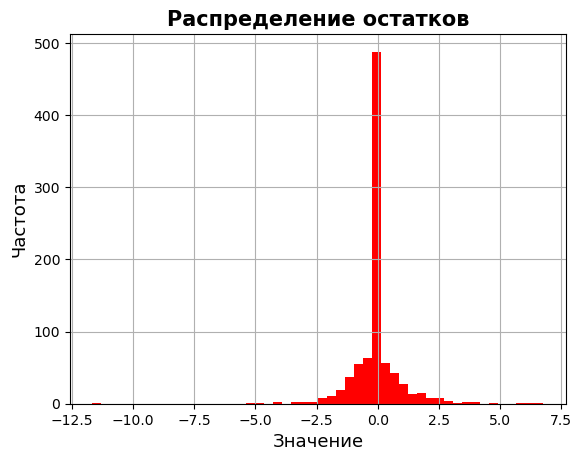

In [54]:
residuals = pd.DataFrame(model_arima.resid)

plt.figure(figsize=(7, 5))
plt.rc('xtick', color='black')
residuals.hist(bins=50, color='red')

plt.xlabel("Значение", fontsize=13)
plt.ylabel("Частота", fontsize=13)
plt.title(
    "Распределение остатков",
    fontsize=15,
    fontweight='bold'
)

plt.show()

Модель ARIMA возможно применять для прогнозирования цен акций в качестве дополнительного полезного инструмента в арсенале трейдера и аналитика, однако, волатильность цен может оказать негативное влияние на качество модели, важным требованием является стационарность временного ряда, а также в зависимости от особенностей временного ряда модель требует детальной настройки.

<span style="color: orange;">**3. Построение моделей Linear Regression (линейная регрессия) для прогнозирования цен акций.**</span>

Для оценки качества моделей используем метрики MSE и r2_score из модуля sklearn.metrics. Метрика Mean Squared Error (MSE) – среднеквадратическая ошибка – измеряет среднее значение квадратов разностей между прогнозируемыми и фактическими значениями в наборе данных. Значение MSE всегда положительное, идеальное значение равно 0, то есть ошибка в прогнозе отсутствует. Метрика r2_score вычисляет коэффициент детерминации. Коэффициент детерминации показывает, какую долю дисперсии целевой переменной объясняет модель. Метрика r2_score варьируется от 0 до 1, где 1 – наилучшее значение метрики.

Линейная регрессия – это один из базовых методов машинного обучения, используемый для моделирования линейной зависимости между целевой переменной и признаками. 

Разделяем данные на целевую переменную и признаки. Целевая переменная – столбец «Close» с информацией о цене закрытия торгов.

In [55]:
X1 = data_result_1.loc[:, data_result_1.columns != 'Close']
y1 = data_result_1['Close']

Разделяем набор данных на два подмножества: для обучения и для тестирования. Разделение данных на тренировочные и тестовые помогает избежать переобучения и обеспечивает объективную оценку производительности модели. В данном случае размер тестовой выборки составляет 20%, то есть 20% данных будет использовано для тестирования, 80% данных – для обучающей выборки.

In [56]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1,
    y1,
    test_size=0.2,
    random_state=42
)

StandartScaler стандартизирует данные, то есть приводит данные к стандартному нормальному распределению с центром в нуле и стандартным отклонением, равным единице. Стандартизация применяется только к признакам. Стандартизация не применяется к целевой переменной, поскольку это может изменить ее оригинальное значение, что приведет к неправильным прогнозам. StandartScaler обязательно необходимо применять в моделях линейной регрессии, поскольку коэффициенты линейной регрессии чувствительны к масштабу признаков.

In [57]:
scaler = StandardScaler()
scaler.fit(X1_train)

X1_train = pd.DataFrame(
    scaler.transform(X1_train),
    columns=X1_train.columns
)

X1_test = pd.DataFrame(
    scaler.transform(X1_test),
    columns=X1_test.columns
)

Обучаем первый вариант модели линейной регрессии. В данном варианте используются все имеющиеся признаки. 

In [58]:
start_time_1 = perf_counter()

model_1 = LinearRegression()
model_1.fit(X1_train, y1_train)

end_time_1 = perf_counter()
execution_time_1 = end_time_1 - start_time_1

print(f"Время обучения модели: {execution_time_1:.6f} секунд")

Время обучения модели: 0.285920 секунд


In [59]:
display(model_1)

LinearRegression()

Выводим метрики MSE и r2_score на тренировочной и тестовой выборках.

In [60]:
train_predict_1 = model_1.predict(X1_train)
test_predict_1 = model_1.predict(X1_test)

mse_train_1 = mean_squared_error(y1_train, train_predict_1)
mse_test_1 = mean_squared_error(y1_test, test_predict_1)

r2_train_1 = r2_score(y1_train, train_predict_1)
r2_test_1 = r2_score(y1_test, test_predict_1)

print(f"Train MSE: {mse_train_1:.6f}")
print(f"Test MSE: {mse_test_1:.6f}")

print(f"Train r2_score: {r2_train_1:.6f}")
print(f"Test r2_score: {r2_test_1:.6f}")

Train MSE: 5.724687
Test MSE: 5.762694
Train r2_score: 0.999925
Test r2_score: 0.999923


Выводим веса (coef), которые модель линейной регрессии присвоила признакам, а также признаки, оценки коэффициентов которых по модулю на порядок превышают оценки прочих признаков.

In [61]:
coef_1 = model_1.coef_
feat_1 = X1.columns

threshold = np.max(np.abs(coef_1)) / 10

imp_feat_1 = [
    feat_1[i] for i in range(len(coef_1))
    if abs(coef_1[i]) > threshold
]

print("Коэффициенты модели:", coef_1)
print("Важные признаки:", imp_feat_1)

Коэффициенты модели: [-1.60922166e+02  2.20367789e+02  2.16646830e+02 -5.48610071e-03
  1.29351826e-03 -3.31361831e-04 -2.17364612e-03 -7.27153037e-03
 -1.99210357e-02 -1.49963676e-02]
Важные признаки: ['Open', 'High', 'Low']


Линейная регрессия эффективна в работе с линейными зависимостями, поэтому во втором варианте модели линейной регрессии удаляем несколько признаков, которые согласно матрице корреляции имеют слабую корреляцию с целевой переменной. После удаления признаков повторяем последовательность действий: разделяем данные на целевую переменную и признаки, затем разделяем данные на тренировочную и тестовую выборки, проводим стандартизацию признаков, обучаем модель линейной регрессии, выводим метрики MSE и r2_score, веса и наиболее значимые признаки.

In [62]:
data_result_2 = data_new.drop(
    ['Volume',
     'Stock Splits',
     'Company',
     'Day'],
    axis=1
)

display(data_result_2)

,Open,High,Low,Close,Dividends,Year,Month
0,43.829761,43.863354,42.639594,43.083508,0.00,2018,11
1,104.769074,105.519257,103.534595,104.636131,0.00,2018,11
2,54.176498,55.007500,54.099998,54.729000,0.00,2018,11
3,83.749496,84.499496,82.616501,83.678497,0.00,2018,11
4,39.692784,40.064904,38.735195,39.037853,0.04,2018,11
...,...,...,...,...,...,...,...
602957,26.360001,26.397499,26.120001,26.150000,0.00,2023,11
602958,27.680000,28.535000,27.680000,28.350000,0.00,2023,11
602959,75.940002,76.555000,75.257500,75.610001,0.00,2023,11
602960,45.230000,45.259998,44.040001,44.209999,0.00,2023,11


In [63]:
X2 = data_result_2.loc[:, data_result_2.columns != 'Close']
y2 = data_result_2['Close']

In [64]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2,
    y2,
    test_size=0.2,
    random_state=42
)

In [65]:
scaler = StandardScaler()
scaler.fit(X2_train)

X2_train = pd.DataFrame(
    scaler.transform(X2_train),
    columns=X2_train.columns
)

X2_test = pd.DataFrame(
    scaler.transform(X2_test),
    columns=X2_test.columns
)

In [66]:
start_time_2 = perf_counter()

model_2 = LinearRegression()
model_2.fit(X2_train, y2_train)

end_time_2 = perf_counter()
execution_time_2 = end_time_2 - start_time_2

print(f"Время обучения модели: {execution_time_2:.6f} секунд")

Время обучения модели: 0.082160 секунд


In [67]:
display(model_2)

LinearRegression()

In [68]:
train_predict_2 = model_2.predict(X2_train)
test_predict_2 = model_2.predict(X2_test)

mse_train_2 = mean_squared_error(y2_train, train_predict_2)
mse_test_2 = mean_squared_error(y2_test, test_predict_2)

r2_train_2 = r2_score(y2_train, train_predict_2)
r2_test_2 = r2_score(y2_test, test_predict_2)

print(f"Train MSE: {mse_train_2:.6f}")
print(f"Test MSE: {mse_test_2:.6f}")

print(f"Train r2_score: {r2_train_2:.6f}")
print(f"Test r2_score: {r2_test_2:.6f}")

Train MSE: 5.724946
Test MSE: 5.762745
Train r2_score: 0.999925
Test r2_score: 0.999923


In [69]:
coef_2 = model_2.coef_
feat_2 = X2.columns

threshold = np.max(np.abs(coef_2)) / 10

imp_feat_2 = [
    feat_2[i] for i in range(len(coef_2))
    if abs(coef_2[i]) > threshold
]

print("Коэффициенты модели:", coef_2)
print("Важные признаки:", imp_feat_2)

Коэффициенты модели: [-1.60917832e+02  2.20360082e+02  2.16650800e+02  1.30926546e-03
 -7.19664046e-03 -1.98301191e-02]
Важные признаки: ['Open', 'High', 'Low']


В третьем варианте модели линейной регрессии добавляем новый признак – индикатор среднего истинного диапазона (ATR). В качестве истинного диапазона выбирается максимальное абсолютное значение из трех величин: разница между максимальной и минимальной ценой в течение торгового дня (HL); разница между максимальной ценой и ценой вчерашнего закрытия торгов (HC); разница между минимальной ценой и ценой вчерашнего закрытия торгов (LC). ATR вычисляется как экспоненциальная скользящая средняя истинного диапазона за определенный период. Задаем период для расчета, используем рекурсивную формулу расчета, то есть каждый следующий член последовательности вычисляется через предыдущие члены. Значение ATR показывает наличие волатильности, то есть показывает изменчивость цены в определенный промежуток времени, характеризует тенденцию изменчивости цены – резкое падение или рост приводит к росту волатильности. В качестве сигнала на покупку акций можно использовать момент, когда ATR начинает расти вместе с увеличением цены. Сигналом на продажу акции может стать рост ATR при одновременном снижении цены. 

Добавляем в набор данных разницу между максимальной и минимальной ценой в течение торгового дня (HL).

In [70]:
data_ATR = data.sort_values(
    by=['Company', 'Date']
)


def HL(High, Low):
    return High - Low


data_ATR['HL'] = data.apply(
    lambda row: HL(
        row['High'],
        row['Low']
    ),
    axis=1
)

display(data_ATR)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company,Year,Month,Day,HL
285,2018-11-29,68.673458,69.589358,68.673458,69.001251,2625800,0.0,0.0,A,2018,11,29,0.915900
743,2018-11-30,69.059076,70.042470,68.779483,69.753235,2279500,0.0,0.0,A,2018,11,30,1.262987
1201,2018-12-03,70.698073,72.105671,70.563099,71.989975,4265200,0.0,0.0,A,2018,12,3,1.542572
1659,2018-12-04,72.018907,72.414195,70.023203,70.293159,4263800,0.0,0.0,A,2018,12,4,2.390992
2117,2018-12-06,68.644532,69.348335,67.391195,69.329056,3505900,0.0,0.0,A,2018,12,6,1.957139
...,...,...,...,...,...,...,...,...,...,...,...,...,...
600640,2023-11-22,180.000000,180.970001,178.779999,179.350006,1501500,0.0,0.0,ZTS,2023,11,22,2.190002
601131,2023-11-24,180.169998,181.389999,179.380005,180.210007,635200,0.0,0.0,ZTS,2023,11,24,2.009995
601622,2023-11-27,180.029999,180.789993,178.470001,178.789993,1442700,0.0,0.0,ZTS,2023,11,27,2.319992
602113,2023-11-28,178.110001,178.360001,176.160004,176.970001,1348900,0.0,0.0,ZTS,2023,11,28,2.199997


Добавляем в набор данных разницу между максимальной ценой в течение торгового дня и ценой вчерашнего закрытия торгов (HC).

In [71]:
data_ATR = data_ATR.sort_values(
    by=['Company', 'Date']
)

data_ATR['Close_yesterday'] = data_ATR.groupby(
    'Company'
)['Close'].shift(1)

data_ATR['HC'] = data_ATR['High'] - data_ATR['Close_yesterday']

display(data_ATR)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company,Year,Month,Day,HL,Close_yesterday,HC
285,2018-11-29,68.673458,69.589358,68.673458,69.001251,2625800,0.0,0.0,A,2018,11,29,0.915900,NaN,NaN
743,2018-11-30,69.059076,70.042470,68.779483,69.753235,2279500,0.0,0.0,A,2018,11,30,1.262987,69.001251,1.041219
1201,2018-12-03,70.698073,72.105671,70.563099,71.989975,4265200,0.0,0.0,A,2018,12,3,1.542572,69.753235,2.352436
1659,2018-12-04,72.018907,72.414195,70.023203,70.293159,4263800,0.0,0.0,A,2018,12,4,2.390992,71.989975,0.424220
2117,2018-12-06,68.644532,69.348335,67.391195,69.329056,3505900,0.0,0.0,A,2018,12,6,1.957139,70.293159,-0.944825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600640,2023-11-22,180.000000,180.970001,178.779999,179.350006,1501500,0.0,0.0,ZTS,2023,11,22,2.190002,178.729996,2.240005
601131,2023-11-24,180.169998,181.389999,179.380005,180.210007,635200,0.0,0.0,ZTS,2023,11,24,2.009995,179.350006,2.039993
601622,2023-11-27,180.029999,180.789993,178.470001,178.789993,1442700,0.0,0.0,ZTS,2023,11,27,2.319992,180.210007,0.579987
602113,2023-11-28,178.110001,178.360001,176.160004,176.970001,1348900,0.0,0.0,ZTS,2023,11,28,2.199997,178.789993,-0.429993


Добавляем в набор данных разницу между минимальной ценой в течение торгового дня и ценой вчерашнего закрытия торгов (LC).

In [72]:
data_ATR = data_ATR.sort_values(
    by=['Company', 'Date']
)

data_ATR['Close_yesterday'] = data_ATR.groupby(
    'Company'
)['Close'].shift(1)

data_ATR['LC'] = data_ATR['Low'] - data_ATR['Close_yesterday']

display(data_ATR)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company,Year,Month,Day,HL,Close_yesterday,HC,LC
285,2018-11-29,68.673458,69.589358,68.673458,69.001251,2625800,0.0,0.0,A,2018,11,29,0.915900,NaN,NaN,NaN
743,2018-11-30,69.059076,70.042470,68.779483,69.753235,2279500,0.0,0.0,A,2018,11,30,1.262987,69.001251,1.041219,-0.221768
1201,2018-12-03,70.698073,72.105671,70.563099,71.989975,4265200,0.0,0.0,A,2018,12,3,1.542572,69.753235,2.352436,0.809864
1659,2018-12-04,72.018907,72.414195,70.023203,70.293159,4263800,0.0,0.0,A,2018,12,4,2.390992,71.989975,0.424220,-1.966772
2117,2018-12-06,68.644532,69.348335,67.391195,69.329056,3505900,0.0,0.0,A,2018,12,6,1.957139,70.293159,-0.944825,-2.901964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600640,2023-11-22,180.000000,180.970001,178.779999,179.350006,1501500,0.0,0.0,ZTS,2023,11,22,2.190002,178.729996,2.240005,0.050003
601131,2023-11-24,180.169998,181.389999,179.380005,180.210007,635200,0.0,0.0,ZTS,2023,11,24,2.009995,179.350006,2.039993,0.029999
601622,2023-11-27,180.029999,180.789993,178.470001,178.789993,1442700,0.0,0.0,ZTS,2023,11,27,2.319992,180.210007,0.579987,-1.740005
602113,2023-11-28,178.110001,178.360001,176.160004,176.970001,1348900,0.0,0.0,ZTS,2023,11,28,2.199997,178.789993,-0.429993,-2.629990


In [73]:
data_ATR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 602962 entries, 285 to 602604
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             602962 non-null  datetime64[ns]
 1   Open             602962 non-null  float64       
 2   High             602962 non-null  float64       
 3   Low              602962 non-null  float64       
 4   Close            602962 non-null  float64       
 5   Volume           602962 non-null  int64         
 6   Dividends        602962 non-null  float64       
 7   Stock Splits     602962 non-null  float64       
 8   Company          602962 non-null  object        
 9   Year             602962 non-null  int32         
 10  Month            602962 non-null  int32         
 11  Day              602962 non-null  int32         
 12  HL               602962 non-null  float64       
 13  Close_yesterday  602471 non-null  float64       
 14  HC               602471

Проводим расчет показателя ATR и выводим его динамику по выбранной компании.

In [74]:
data_ATR = data_ATR.sort_values(
    by=['Company', 'Date']
)

data_ATR['TR'] = data_ATR[['HL', 'HC', 'LC']].max(axis=1)

period = 14

data_ATR['ATR'] = data_ATR['TR'].ewm(
    span=period,
    adjust=False
).mean()

display(data_ATR)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company,Year,Month,Day,HL,Close_yesterday,HC,LC,TR,ATR
285,2018-11-29,68.673458,69.589358,68.673458,69.001251,2625800,0.0,0.0,A,2018,11,29,0.915900,NaN,NaN,NaN,0.915900,0.915900
743,2018-11-30,69.059076,70.042470,68.779483,69.753235,2279500,0.0,0.0,A,2018,11,30,1.262987,69.001251,1.041219,-0.221768,1.262987,0.962178
1201,2018-12-03,70.698073,72.105671,70.563099,71.989975,4265200,0.0,0.0,A,2018,12,3,1.542572,69.753235,2.352436,0.809864,2.352436,1.147546
1659,2018-12-04,72.018907,72.414195,70.023203,70.293159,4263800,0.0,0.0,A,2018,12,4,2.390992,71.989975,0.424220,-1.966772,2.390992,1.313339
2117,2018-12-06,68.644532,69.348335,67.391195,69.329056,3505900,0.0,0.0,A,2018,12,6,1.957139,70.293159,-0.944825,-2.901964,1.957139,1.399179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600640,2023-11-22,180.000000,180.970001,178.779999,179.350006,1501500,0.0,0.0,ZTS,2023,11,22,2.190002,178.729996,2.240005,0.050003,2.240005,3.822476
601131,2023-11-24,180.169998,181.389999,179.380005,180.210007,635200,0.0,0.0,ZTS,2023,11,24,2.009995,179.350006,2.039993,0.029999,2.039993,3.584811
601622,2023-11-27,180.029999,180.789993,178.470001,178.789993,1442700,0.0,0.0,ZTS,2023,11,27,2.319992,180.210007,0.579987,-1.740005,2.319992,3.416169
602113,2023-11-28,178.110001,178.360001,176.160004,176.970001,1348900,0.0,0.0,ZTS,2023,11,28,2.199997,178.789993,-0.429993,-2.629990,2.199997,3.254012


Введите название компании:  LI


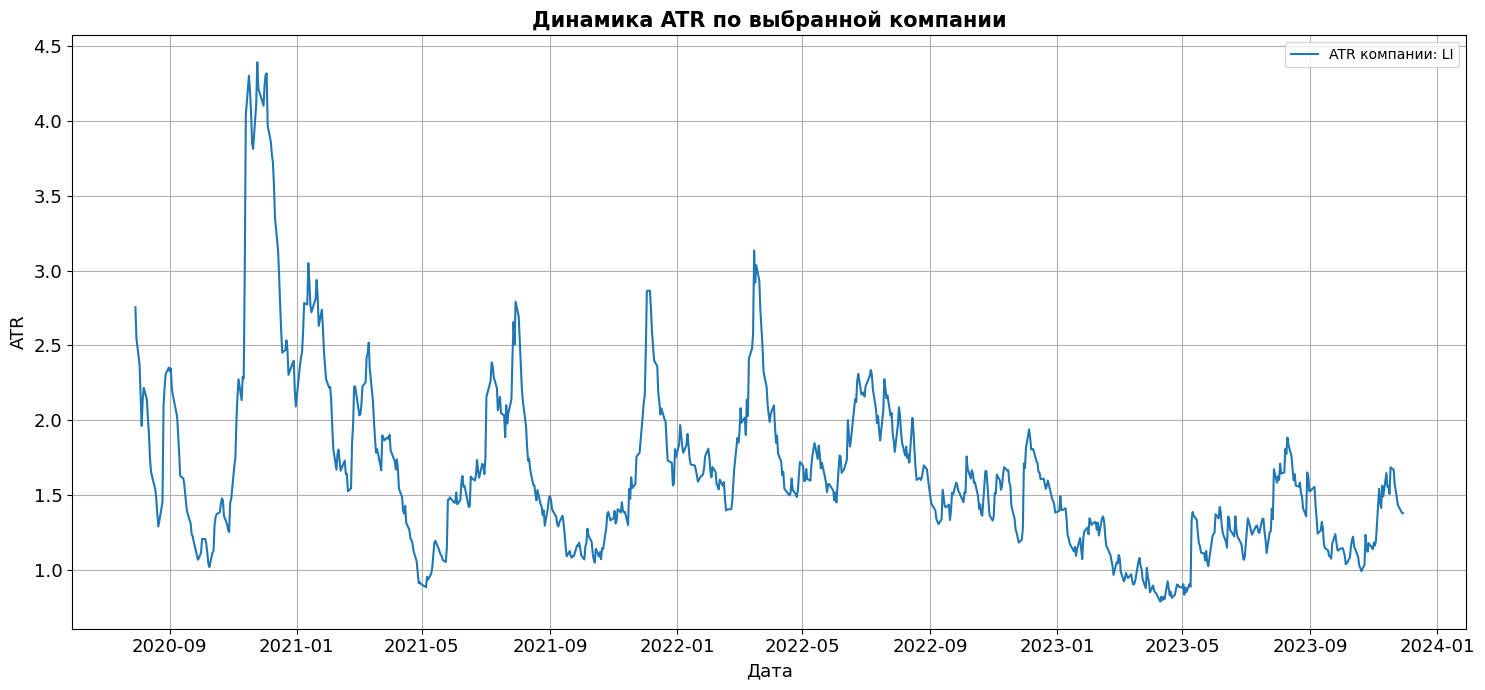

In [75]:
company = input(
    "Введите название компании: "
)

plt.figure(figsize=(15, 7))
plt.rc('xtick', color='black')
plt.tick_params(
    axis='both',
    which='major',
    labelsize=13
)

sns.lineplot(
    x='Date',
    y='ATR',
    data=data_ATR[data_ATR['Company'] == company],
    label=f'ATR компании: {company}'
)

plt.xlabel("Дата", fontsize=13)
plt.ylabel("ATR", fontsize=13)
plt.title(
    "Динамика ATR по выбранной компании",
    fontsize=15,
    fontweight='bold'
)

plt.legend(loc='best', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

Удаляем лишние столбцы, разделяем данные на целевую переменную и признаки, затем разделяем данные на тренировочную и тестовую выборки. Проводим стандартизацию признаков. Обучаем модель линейной регрессии, выводим метрики MSE и r2_score, веса и наиболее значимые признаки.

In [76]:
data_result_3 = data_ATR.drop(
    [
        'Date',
        'Volume',
        'Stock Splits',
        'Company',
        'Day',
        'HL',
        'Close_yesterday',
        'HC',
        'LC',
        'TR'
    ],
    axis=1
)

display(data_result_3)

,Open,High,Low,Close,Dividends,Year,Month,ATR
285,68.673458,69.589358,68.673458,69.001251,0.0,2018,11,0.915900
743,69.059076,70.042470,68.779483,69.753235,0.0,2018,11,0.962178
1201,70.698073,72.105671,70.563099,71.989975,0.0,2018,12,1.147546
1659,72.018907,72.414195,70.023203,70.293159,0.0,2018,12,1.313339
2117,68.644532,69.348335,67.391195,69.329056,0.0,2018,12,1.399179
...,...,...,...,...,...,...,...,...
600640,180.000000,180.970001,178.779999,179.350006,0.0,2023,11,3.822476
601131,180.169998,181.389999,179.380005,180.210007,0.0,2023,11,3.584811
601622,180.029999,180.789993,178.470001,178.789993,0.0,2023,11,3.416169
602113,178.110001,178.360001,176.160004,176.970001,0.0,2023,11,3.254012


In [77]:
X3 = data_result_3.loc[:, data_result_3.columns != 'Close']
y3 = data_result_3['Close']

In [78]:
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3,
    y3,
    test_size=0.2,
    random_state=42
)

In [79]:
scaler = StandardScaler()
scaler.fit(X3_train)

X3_train = pd.DataFrame(
    scaler.transform(X3_train),
    columns=X3_train.columns
)

X3_test = pd.DataFrame(
    scaler.transform(X3_test),
    columns=X3_test.columns
)

In [80]:
start_time_3 = perf_counter()

model_3 = LinearRegression()
model_3.fit(X3_train, y3_train)

end_time_3 = perf_counter()
execution_time_3 = end_time_3 - start_time_3

print(f"Время обучения модели: {execution_time_3:.6f} секунд")

Время обучения модели: 0.100110 секунд


In [81]:
display(model_3)

LinearRegression()

In [82]:
train_predict_3 = model_3.predict(X3_train)
test_predict_3 = model_3.predict(X3_test)

mse_train_3 = mean_squared_error(y3_train, train_predict_3)
mse_test_3 = mean_squared_error(y3_test, test_predict_3)

r2_train_3 = r2_score(y3_train, train_predict_3)
r2_test_3 = r2_score(y3_test, test_predict_3)

print(f"Train MSE: {mse_train_3:.6f}")
print(f"Test MSE: {mse_test_3:.6f}")

print(f"Train r2_score: {r2_train_3:.6f}")
print(f"Test r2_score: {r2_test_3:.6f}")

Train MSE: 5.711851
Test MSE: 5.808678
Train r2_score: 0.999925
Test r2_score: 0.999923


In [83]:
coef_3 = model_3.coef_
feat_3 = X3.columns

threshold = np.max(np.abs(coef_3)) / 10

imp_feat_3 = [
    feat_3[i] for i in range(len(coef_3))
    if abs(coef_3[i]) > threshold
]

print("Коэффициенты модели:", coef_3)
print("Важные признаки:", imp_feat_3)

Коэффициенты модели: [-1.55467772e+02  2.21525292e+02  2.09740288e+02  5.10878872e-03
 -8.77192167e-03 -1.80974554e-02 -7.61959309e-02]
Важные признаки: ['Open', 'High', 'Low']


Все три варианта моделей линейной регрессии показали хорошие результаты. Значения метрики r2_score практически идентичны и указывают на отличное качество моделей. Значения метрики MSE также схожи во всех вариантах, однако в третьем варианте наблюдается рост MSE на тестовых данных, что может указывать на незначительные признаки возможного переобучения модели. Удаление признаков и добавление нового признака не привели к существенным изменениям качества моделей.

<span style="color: orange;">**4. Построение моделей Random Forest Regressor (случайный лес для регрессии) для прогнозирования цен акций.**</span>

Random Forest Regressor – это метод ансамблевого обучения, который объединяет множество деревьев решений для создания точных и стабильных прогнозов. Для каждого дерева создается бутстрэп подвыборка – случайная подвыборка данных с возвращением. Для каждой подвыборки строится отдельное дерево. На каждом узле выбирается случайное подмножество признаков. Деревья строятся до максимальной глубины. Множество деревьев решений образуют ансамбль деревьев, каждое дерево делает свое предсказание, а итоговый результат получается путем усреднения всех предсказаний.

В первом варианте модели Random Forest Regressor удаляем ранее добавленный признак ATR. Разделяем данные на целевую переменную и признаки, затем разделяем данные на тренировочную и тестовую выборки.

In [84]:
data_result_4 = data_result_3.drop(['ATR'], axis=1)

display(data_result_4)

,Open,High,Low,Close,Dividends,Year,Month
285,68.673458,69.589358,68.673458,69.001251,0.0,2018,11
743,69.059076,70.042470,68.779483,69.753235,0.0,2018,11
1201,70.698073,72.105671,70.563099,71.989975,0.0,2018,12
1659,72.018907,72.414195,70.023203,70.293159,0.0,2018,12
2117,68.644532,69.348335,67.391195,69.329056,0.0,2018,12
...,...,...,...,...,...,...,...
600640,180.000000,180.970001,178.779999,179.350006,0.0,2023,11
601131,180.169998,181.389999,179.380005,180.210007,0.0,2023,11
601622,180.029999,180.789993,178.470001,178.789993,0.0,2023,11
602113,178.110001,178.360001,176.160004,176.970001,0.0,2023,11


In [85]:
X4 = data_result_4.loc[:, data_result_4.columns != 'Close']
y4 = data_result_4['Close']

In [86]:
X4_train, X4_test, y4_train, y4_test = train_test_split(
    X4,
    y4,
    test_size=0.2,
    random_state=42
)

In [87]:
scaler = StandardScaler()
scaler.fit(X4_train)

X4_train = pd.DataFrame(
    scaler.transform(X4_train),
    columns=X4_train.columns
)

X4_test = pd.DataFrame(
    scaler.transform(X4_test),
    columns=X4_test.columns
)

Обучаем модель Random Forest Regressor, выводим метрики MSE и r2_score. В модели Random Forest Regressor используем следующие параметры: 
n_estimators – количество деревьев в случайном лесу, чем больше деревьев, тем лучше качество модели, но дольше обучение, однако, в определенный момент количество деревьев может перестать переходить в качество модели, 500 деревьев – достаточное большое значение для большинства задач;
max_depth – максимальная глубина каждого дерева, то есть количество уровней ветвления, помогает избежать переобучения;
min_samples_split – минимальное количество объектов, необходимое для разделения узла;
min_samples_leaf – минимальное количество объектов в листе дерева;
max_features – количество признаков, которые рассматриваются при каждом разделении, например, в данной задаче использован 'log2', то есть логарифм по основанию 2 от числа признаков, поскольку он подходит для больших данных и применяется, когда, возможно, есть избыточные признаки.

In [88]:
start_time_4 = perf_counter()

model_4 = RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    random_state=42
)

model_4.fit(X4_train, y4_train)

end_time_4 = perf_counter()
execution_time_4 = end_time_4 - start_time_4

print(f"Время обучения модели: {execution_time_4:.6f} секунд")

Время обучения модели: 411.683912 секунд


In [89]:
display(model_4)

RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=500, random_state=42)

In [90]:
train_predict_4 = model_4.predict(X4_train)
test_predict_4 = model_4.predict(X4_test)

mse_train_4 = mean_squared_error(y4_train, train_predict_4)
mse_test_4 = mean_squared_error(y4_test, test_predict_4)

r2_train_4 = r2_score(y4_train, train_predict_4)
r2_test_4 = r2_score(y4_test, test_predict_4)

print(f"Train MSE: {mse_train_4:.6f}")
print(f"Test MSE: {mse_test_4:.6f}")

print(f"Train r2_score: {r2_train_4:.6f}")
print(f"Test r2_score: {r2_test_4:.6f}")

Train MSE: 7.508241
Test MSE: 12.456048
Train r2_score: 0.999901
Test r2_score: 0.999835


Во втором варианте модели Random Forest Regressor удаляем несколько признаков, имеющих слабую корреляцию с целевой переменной, оставляем в качестве признаков только цену открытия торгов, а также максимальную и минимальную цены акции, достигнутые в течение торгового дня. Разделяем данные на целевую переменную и признаки, затем разделяем данные на тренировочную и тестовую выборки.

In [91]:
data_result_5 = data_result_4.drop(
    [
        'Dividends',
        'Year',
        'Month'
    ],
    axis=1
)

display(data_result_5)

,Open,High,Low,Close
285,68.673458,69.589358,68.673458,69.001251
743,69.059076,70.042470,68.779483,69.753235
1201,70.698073,72.105671,70.563099,71.989975
1659,72.018907,72.414195,70.023203,70.293159
2117,68.644532,69.348335,67.391195,69.329056
...,...,...,...,...
600640,180.000000,180.970001,178.779999,179.350006
601131,180.169998,181.389999,179.380005,180.210007
601622,180.029999,180.789993,178.470001,178.789993
602113,178.110001,178.360001,176.160004,176.970001


In [92]:
X5 = data_result_5.loc[:, data_result_5.columns != 'Close']
y5 = data_result_5['Close']

In [93]:
X5_train, X5_test, y5_train, y5_test = train_test_split(
    X5,
    y5,
    test_size=0.2,
    random_state=42
)

In [94]:
scaler = StandardScaler()
scaler.fit(X5_train)

X5_train = pd.DataFrame(
    scaler.transform(X5_train),
    columns=X5_train.columns
)

X5_test = pd.DataFrame(
    scaler.transform(X5_test),
    columns=X5_test.columns
)

Поскольку избыточные признаки удалены, поменяем один из параметров модели max_features на 'sqrt', то есть на квадратный корень от общего числа признаков.  'sqrt' снижает риск переобучения и сохраняет хорошую обобщающую способность модели. Обучаем модель Random Forest Regressor, выводим метрики MSE и r2_score.

In [95]:
start_time_5 = perf_counter()

model_5 = RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

model_5.fit(X5_train, y5_train)

end_time_5 = perf_counter()
execution_time_5 = end_time_5 - start_time_5

print(f"Время обучения модели: {execution_time_5:.6f} секунд")

Время обучения модели: 405.587438 секунд


In [96]:
display(model_5)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=500, random_state=42)

In [97]:
train_predict_5 = model_5.predict(X5_train)
test_predict_5 = model_5.predict(X5_test)

mse_train_5 = mean_squared_error(y5_train, train_predict_5)
mse_test_5 = mean_squared_error(y5_test, test_predict_5)

r2_train_5 = r2_score(y5_train, train_predict_5)
r2_test_5 = r2_score(y5_test, test_predict_5)

print(f"Train MSE: {mse_train_5:.6f}")
print(f"Test MSE: {mse_test_5:.6f}")

print(f"Train r2_score: {r2_train_5:.6f}")
print(f"Test r2_score: {r2_test_5:.6f}")

Train MSE: 6.311053
Test MSE: 10.436230
Train r2_score: 0.999917
Test r2_score: 0.999861


В третьем варианте модели Random Forest Regressor изменим параметр n_estimators. Увеличим количество деревьев до 700. Обучаем модель Random Forest Regressor, выводим метрики MSE и r2_score.

In [98]:
X6 = data_result_5.loc[:, data_result_5.columns != 'Close']
y6 = data_result_5['Close']

In [99]:
X6_train, X6_test, y6_train, y6_test = train_test_split(
    X6,
    y6,
    test_size=0.2,
    random_state=42
)

In [100]:
scaler = StandardScaler()
scaler.fit(X6_train)

X6_train = pd.DataFrame(
    scaler.transform(X6_train),
    columns=X6_train.columns
)

X6_test = pd.DataFrame(
    scaler.transform(X6_test),
    columns=X6_test.columns
)

In [101]:
start_time_6 = perf_counter()

model_6 = RandomForestRegressor(
    n_estimators=700,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

model_6.fit(X6_train, y6_train)

end_time_6 = perf_counter()
execution_time_6 = end_time_6 - start_time_6

print(f"Время обучения модели: {execution_time_6:.6f} секунд")

Время обучения модели: 576.712307 секунд


In [102]:
display(model_6)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=700, random_state=42)

In [103]:
train_predict_6 = model_6.predict(X6_train)
test_predict_6 = model_6.predict(X6_test)

mse_train_6 = mean_squared_error(y6_train, train_predict_6)
mse_test_6 = mean_squared_error(y6_test, test_predict_6)

r2_train_6 = r2_score(y6_train, train_predict_6)
r2_test_6 = r2_score(y6_test, test_predict_6)

print(f"Train MSE: {mse_train_6:.6f}")
print(f"Test MSE: {mse_test_6:.6f}")

print(f"Train r2_score: {r2_train_6:.6f}")
print(f"Test r2_score: {r2_test_6:.6f}")

Train MSE: 6.315878
Test MSE: 10.413405
Train r2_score: 0.999917
Test r2_score: 0.999862


Обучение моделей Random Forest Regressor занимает значительно больше времени по сравнению с моделями линейной регрессии. Значения метрики r2_score во всех трех вариантах моделей Random Forest Regressor практически идентичны и указывают на отличное качество моделей. Однако, наблюдается существенный рост значения метрики MSE на тестовых данных, что указывает о наличии небольшого переобучения модели. Удаление всех признаков, имеющих слабую корреляцию с целевой переменной, во втором и в третьем вариантах модели помогло уменьшить MSE на тестовых данных. Увеличение количества деревьев в третьем варианте модели увеличило время обучения модели, но не способствовало улучшению метрик. 

<span style="color: orange;">**5. Построение моделей LGBMRegressor (градиентный бустинг для регрессии) для прогнозирования цен акций.**</span>

LGBMRegressor – это реализация градиентного бустинга для задач регрессии, последовательное построение деревьев, исправляющих ошибки предыдущих. LGBMRegressor является классом внутри библиотеки LightGBM. По сравнению с XGBoost LightGBM является более эффективным и быстрым алгоритмом в работе с большими объемами данных, также LightGBM отличается меньшим потреблением памяти. При построении деревьев решений используется рост по листьям, то есть на каждом шаге выбирается лист, который даёт максимальное улучшение модели. 

В первом варианте модели LGBMRegressor используем все имеющиеся признаки. Используем следующие параметры модели: objective – тип задачи, в данном случае регрессия; n_estimators – количество деревьев в ансамбле, увеличение количества улучшает точность, но замедляет обучение; max_depth – максимальная глубина каждого дерева, глубокие деревья могут приводить к переобучению; learning_rate – скорость обучения (шаг градиентного спуска); min_child_samples – минимальное количество объектов в листе; colsample_bytree – доля признаков для каждого дерева; subsample – доля объектов для каждого дерева. 

In [104]:
display(data_result_1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company,Year,Month,Day
0,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,1.0,2018,11,29
1,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,298.0,2018,11,29
2,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,199.0,2018,11,29
3,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,28.0,2018,11,29
4,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,320.0,2018,11,29
...,...,...,...,...,...,...,...,...,...,...,...
602957,26.360001,26.397499,26.120001,26.150000,1729147,0.00,0.0,354.0,2023,11,29
602958,27.680000,28.535000,27.680000,28.350000,1940066,0.00,0.0,182.0,2023,11,29
602959,75.940002,76.555000,75.257500,75.610001,298699,0.00,0.0,229.0,2023,11,29
602960,45.230000,45.259998,44.040001,44.209999,2217579,0.00,0.0,84.0,2023,11,29


In [105]:
X7 = data_result_1.loc[:, data_result_1.columns != 'Close']
y7 = data_result_1['Close']

In [106]:
X7_train, X7_test, y7_train, y7_test = train_test_split(
    X7,
    y7,
    test_size=0.2,
    random_state=42
)

In [107]:
scaler = StandardScaler()
scaler.fit(X7_train)

X7_train = pd.DataFrame(
    scaler.transform(X7_train),
    columns=X7_train.columns
)

X7_test = pd.DataFrame(
    scaler.transform(X7_test),
    columns=X7_test.columns
)

В качестве метода оптимизации параметров используем RandomizedSearchCV. Определяем пространство поиска гиперпараметров, указываем значения от и до не включительно, а также шаг поиска. 'reg_alpha' – L1-регуляризация для предотвращение переобучения модели. 'reg_lambda' – L2-регуляризация для контроля сложности модели. Указываем количество итераций для проверки, то есть сколько разных наборов параметров будет протестировано, а также количество фолдов для кросс-валидации. Обучаем модель LGBMRegressor и выводим метрики MSE и r2_score.

In [108]:
start_time_7 = perf_counter()

model_basic_7 = lgb.LGBMRegressor(random_state=42)

param_dist = {
    'n_estimators': np.arange(100, 2000, 100),
    'max_depth': np.arange(3, 10),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'num_leaves': np.arange(10, 100, 10),
    'min_child_samples': np.arange(5, 100, 5),
    'colsample_bytree': np.linspace(0.5, 1.0, 5),
    'subsample': np.linspace(0.5, 1.0, 5),
    'reg_alpha': np.linspace(0, 1, 5),
    'reg_lambda': np.linspace(0, 1, 5)
}

model_7 = RandomizedSearchCV(
    estimator=model_basic_7,
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    cv=3,
    verbose=1,
    random_state=42
)

model_7.fit(X7_train, y7_train)

end_time_7 = perf_counter()
execution_time_7 = end_time_7 - start_time_7

print(f"Время обучения модели: {execution_time_7:.6f} секунд")
print("Лучшие параметры:", model_7.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1587
[LightGBM] [Info] Number of data points in the train set: 482369, number of used features: 10
[LightGBM] [Info] Start training from score 140.174905
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Время обучения модели: 1221.879207 секунд
Лучшие параметры: {'subsample': 0.875, 'reg_lambda': 0.5, 'reg_alpha': 0.25, 'num_leaves': 40, 'n_estimators': 1400, 'min_child_samples': 5, 'max_depth': 9, 'learning_rate': 0.20333333333333334, 'colsample_bytree': 1.0}


In [109]:
display(model_7)

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(random_state=42), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5  , 0.625, 0.75 , 0.875, 1.   ]),
                                        'learning_rate': array([0.01      , 0.04222222, 0.07444444, 0.10666667, 0.13888889,
       0.17111111, 0.20333333, 0.23555556, 0.26777778, 0.3       ]),
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_child_samples': array([ 5, 10, 15,...
       90, 95]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]),
                                        'num_leaves': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'reg_alpha': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                                        'reg_lambda': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                                        'subsample': array([0.5  , 0.625, 0.75 , 0.875, 1.   ])},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [110]:
train_predict_7 = model_7.predict(X7_train)
test_predict_7 = model_7.predict(X7_test)

mse_train_7 = mean_squared_error(y7_train, train_predict_7)
mse_test_7 = mean_squared_error(y7_test, test_predict_7)

r2_train_7 = r2_score(y7_train, train_predict_7)
r2_test_7 = r2_score(y7_test, test_predict_7)

print(f"Train MSE: {mse_train_7:.6f}")
print(f"Test MSE: {mse_test_7:.6f}")

print(f"Train r2_score: {r2_train_7:.6f}")
print(f"Test r2_score: {r2_test_7:.6f}")

Train MSE: 5.499973
Test MSE: 53.011790
Train r2_score: 0.999928
Test r2_score: 0.999288


Значение метрики MSE на тестовых данных значительно больше, чем на тренировочных данных, что говорит о переобучении модели. Один из способов борьбы с переобучением – уменьшение количества признаков. Во втором варианте модели LGBMRegressor оставляем в качестве признаков только цену открытия торгов, а также максимальную и минимальную цены акции, достигнутые в течение торгового дня. Разделяем данные на целевую переменную и признаки, затем разделяем данные на тренировочную и тестовую выборки.

In [111]:
display(data_result_5)

,Open,High,Low,Close
285,68.673458,69.589358,68.673458,69.001251
743,69.059076,70.042470,68.779483,69.753235
1201,70.698073,72.105671,70.563099,71.989975
1659,72.018907,72.414195,70.023203,70.293159
2117,68.644532,69.348335,67.391195,69.329056
...,...,...,...,...
600640,180.000000,180.970001,178.779999,179.350006
601131,180.169998,181.389999,179.380005,180.210007
601622,180.029999,180.789993,178.470001,178.789993
602113,178.110001,178.360001,176.160004,176.970001


In [112]:
X8 = data_result_5.loc[:, data_result_5.columns != 'Close']
y8 = data_result_5['Close']

In [113]:
X8_train, X8_test, y8_train, y8_test = train_test_split(
    X8,
    y8,
    test_size=0.2,
    random_state=42
)

In [114]:
scaler = StandardScaler()
scaler.fit(X8_train)

X8_train = pd.DataFrame(
    scaler.transform(X8_train),
    columns=X8_train.columns
)

X8_test = pd.DataFrame(
    scaler.transform(X8_test),
    columns=X8_test.columns
)

Запускаем поиск лучших параметров модели, обучаем модель LGBMRegressor и выводим метрики MSE и r2_score.

In [115]:
start_time_8 = perf_counter()

model_basic_8 = lgb.LGBMRegressor(random_state=42)

param_dist = {
    'n_estimators': np.arange(100, 2000, 100),
    'max_depth': np.arange(3, 10),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'num_leaves': np.arange(10, 100, 10),
    'min_child_samples': np.arange(5, 100, 5),
    'colsample_bytree': np.linspace(0.5, 1.0, 5),
    'subsample': np.linspace(0.5, 1.0, 5),
    'reg_alpha': np.linspace(0, 1, 5),
    'reg_lambda': np.linspace(0, 1, 5)
}

model_8 = RandomizedSearchCV(
    estimator=model_basic_8,
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    cv=3,
    verbose=1,
    random_state=42
)

model_8.fit(X8_train, y8_train)

end_time_8 = perf_counter()
execution_time_8 = end_time_8 - start_time_8

print(f"Время обучения модели: {execution_time_8:.6f} секунд")
print("Лучшие параметры:", model_8.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 482369, number of used features: 3
[LightGBM] [Info] Start training from score 139.944999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [116]:
display(model_8)

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(random_state=42), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5  , 0.625, 0.75 , 0.875, 1.   ]),
                                        'learning_rate': array([0.01      , 0.04222222, 0.07444444, 0.10666667, 0.13888889,
       0.17111111, 0.20333333, 0.23555556, 0.26777778, 0.3       ]),
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_child_samples': array([ 5, 10, 15,...
       90, 95]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]),
                                        'num_leaves': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'reg_alpha': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                                        'reg_lambda': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                                        'subsample': array([0.5  , 0.625, 0.75 , 0.875, 1.   ])},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [117]:
train_predict_8 = model_8.predict(X8_train)
test_predict_8 = model_8.predict(X8_test)

mse_train_8 = mean_squared_error(y8_train, train_predict_8)
mse_test_8 = mean_squared_error(y8_test, test_predict_8)

r2_train_8 = r2_score(y8_train, train_predict_8)
r2_test_8 = r2_score(y8_test, test_predict_8)

print(f"Train MSE: {mse_train_8:.6f}")
print(f"Test MSE: {mse_test_8:.6f}")

print(f"Train r2_score: {r2_train_8:.6f}")
print(f"Test r2_score: {r2_test_8:.6f}")

Train MSE: 6010.494357
Test MSE: 5888.205624
Train r2_score: 0.920948
Test r2_score: 0.921817


В первом варианте модели LGBMRegressor значение метрики r2_score указывает на отличное качество модели, но значение метрики MSE на тестовых данных в разы превышает значение метрики MSE на тренировочных данных, что говорит о значительном переобучении модели. Удаление признаков, имеющих слабую корреляцию с целевой переменной, помогло преодолеть переобучение модели, значение метрики MSE на тестовых данных стало меньше, чем на тренировочных данных, что говорит о повышении стабильности модели. Однако, качество модели ухудшилось, на что указывают снижение r2_score и рост MSE на тренировочных и на тестовых данных.

<span style="color: orange;">**6. Построение ансамбля моделей.**</span>

Построим ансамбль моделей, объединив Linear Regression и LGBMRegressor. Настроим веса для каждой модели. Наибольший вес – на линейную регрессию.

In [118]:
display(data_result_1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company,Year,Month,Day
0,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,1.0,2018,11,29
1,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,298.0,2018,11,29
2,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,199.0,2018,11,29
3,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,28.0,2018,11,29
4,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,320.0,2018,11,29
...,...,...,...,...,...,...,...,...,...,...,...
602957,26.360001,26.397499,26.120001,26.150000,1729147,0.00,0.0,354.0,2023,11,29
602958,27.680000,28.535000,27.680000,28.350000,1940066,0.00,0.0,182.0,2023,11,29
602959,75.940002,76.555000,75.257500,75.610001,298699,0.00,0.0,229.0,2023,11,29
602960,45.230000,45.259998,44.040001,44.209999,2217579,0.00,0.0,84.0,2023,11,29


In [119]:
X9 = data_result_1.loc[:, data_result_1.columns != 'Close']
y9 = data_result_1['Close']

In [120]:
X9_train, X9_test, y9_train, y9_test = train_test_split(
    X9,
    y9,
    test_size=0.2,
    random_state=42
)

In [121]:
scaler = StandardScaler()
scaler.fit(X9_train)

X9_train = pd.DataFrame(
    scaler.transform(X9_train),
    columns=X9_train.columns
)

X9_test = pd.DataFrame(
    scaler.transform(X9_test),
    columns=X9_test.columns
)

In [122]:
start_time_9 = perf_counter()

model_lr = LinearRegression()
model_lr.fit(X9_train, y9_train)

model_lgbm = lgb.LGBMRegressor(
    objective='regression',
    n_estimators=1400,
    num_leaves=40,
    max_depth=9,
    learning_rate=0.203,
    min_child_samples=5,
    colsample_bytree=1.0,
    subsample=0.875,
    reg_lambda=0.5,
    reg_alpha=0.25,
    random_state=42
)
model_lgbm.fit(X9_train, y9_train)

ensemble = VotingRegressor(
    estimators=[
        ('lr', model_lr),
        ('lgbm', model_lgbm)
    ],
    weights=[10, 1]
)
ensemble.fit(X9_train, y9_train)

end_time_9 = perf_counter()
execution_time_9 = end_time_9 - start_time_9

print(f"Время обучения модели: {execution_time_9:.6f} секунд")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1587
[LightGBM] [Info] Number of data points in the train set: 482369, number of used features: 10
[LightGBM] [Info] Start training from score 140.174905
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1587
[LightGBM] [Info] Number of data points in the train set: 482369, number of used features: 10
[L

In [123]:
display(ensemble)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('lgbm',
                             LGBMRegressor(learning_rate=0.203, max_depth=9,
                                           min_child_samples=5,
                                           n_estimators=1400, num_leaves=40,
                                           objective='regression',
                                           random_state=42, reg_alpha=0.25,
                                           reg_lambda=0.5, subsample=0.875))],
                weights=[10, 1])

In [124]:
train_predict_9 = ensemble.predict(X9_train)
test_predict_9 = ensemble.predict(X9_test)

mse_train_9 = mean_squared_error(y9_train, train_predict_9)
mse_test_9 = mean_squared_error(y9_test, test_predict_9)

r2_train_9 = r2_score(y9_train, train_predict_9)
r2_test_9 = r2_score(y9_test, test_predict_9)

print(f"Train MSE: {mse_train_9:.6f}")
print(f"Test MSE: {mse_test_9:.6f}")

print(f"Train r2_score: {r2_train_9:.6f}")
print(f"Test r2_score: {r2_test_9:.6f}")

Train MSE: 5.038165
Test MSE: 5.885855
Train r2_score: 0.999934
Test r2_score: 0.999921


<span style="color: orange;">**7. Сравнительный анализ моделей и выводы.**</span>

В процессе разработки моделей для прогнозирования цен акций проанализировано девять вариантов моделей машинного обучения. Модель Linear Regression представлена в трех вариантах: со всеми имеющимися признаками; затем была удалена часть признаков, имеющих слабую корреляцию с целевой переменной; а также добавлен расчетный признак – индикатор среднего истинного диапазона (ATR). Модель Random Forest Regressor представлена также в трех вариантах: без признаков со слабой корреляцией с целевой переменной; только с тремя признаками, максимально коррелированными с целевой переменной; с увеличением  количества деревьев. Модель LGBMRegressor представлена в двух вариантах. Модель разработана с помощью инструмента для оптимизации гиперпараметров модели RandomizedSearchCV с использованием всех имеющихся признаков, а также только с тремя признаками, максимально коррелированными с целевой переменной. В завершение построен ансамбль моделей, объединяющий модели Linear Regression и LGBMRegressor на данных со всеми имеющимися признаками.

Ниже собраны метрики MSE и r2_score на тренировочных и на тестовых данных, а также время, затраченное на обучение моделей, по всем разработанным моделям. 

In [125]:
data_metric = {
    'model_1_LR': [
        mse_train_1, mse_test_1, r2_train_1, r2_test_1, execution_time_1
    ],
    'model_2_LR': [
        mse_train_2, mse_test_2, r2_train_2, r2_test_2, execution_time_2
    ],
    'model_3_LR': [
        mse_train_3, mse_test_3, r2_train_3, r2_test_3, execution_time_3
    ],
    'model_4_RFR': [
        mse_train_4, mse_test_4, r2_train_4, r2_test_4, execution_time_4
    ],
    'model_5_RFR': [
        mse_train_5, mse_test_5, r2_train_5, r2_test_5, execution_time_5
    ],
    'model_6_RFR': [
        mse_train_6, mse_test_6, r2_train_6, r2_test_6, execution_time_6
    ],
    'model_7_LGBMR': [
        mse_train_7, mse_test_7, r2_train_7, r2_test_7, execution_time_7
    ],
    'model_8_LGBMR': [
        mse_train_8, mse_test_8, r2_train_8, r2_test_8, execution_time_8
    ],
    'ensemble:LR+LGBMR': [
        mse_train_9, mse_test_9, r2_train_9, r2_test_9, execution_time_9
    ]
}

metric = pd.DataFrame(
    data_metric,
    index=[
        'MSE на тренировочных данных',
        'MSE на тестовых данных',
        'r2_score на тренировочных данных',
        'r2_score на тестовых данных',
        'Время обучения модели'
    ]
)

display(metric)

,model_1_LR,model_2_LR,model_3_LR,model_4_RFR,model_5_RFR,model_6_RFR,model_7_LGBMR,model_8_LGBMR,ensemble:LR+LGBMR
MSE на тренировочных данных,5.724687,5.724946,5.711851,7.508241,6.311053,6.315878,5.499973,6010.494357,5.038165
MSE на тестовых данных,5.762694,5.762745,5.808678,12.456048,10.436230,10.413405,53.011790,5888.205624,5.885855
r2_score на тренировочных данных,0.999925,0.999925,0.999925,0.999901,0.999917,0.999917,0.999928,0.920948,0.999934
r2_score на тестовых данных,0.999923,0.999923,0.999923,0.999835,0.999861,0.999862,0.999288,0.921817,0.999921
Время обучения модели,0.285920,0.082160,0.100110,411.683912,405.587438,576.712307,1221.879207,1043.495719,19.698381


По времени обучения модели Linear Regression показали наилучшие результаты. Модели Random Forest Regressor и LGBMRegressor во всех вариантах обучаются достаточно долго. Значения метрики r2_score по всем моделям показали очень хороший результат близкий к единице. Все модели демонстрируют высокую объясняющую способность. Однако, значения метрики MSE на разных моделях имеют значительный разброс. Наименьшее значение MSE на тренировочных данных показала модель LGBMRegressor, но на тестовых данных значение MSE в разы больше, что говорит о сильном переобучении модели, то есть модель хорошо работает на обучающей выборке, но плохо обобщает на новых данных. После удаления признаков, имеющих слабую корреляцию с целевой переменной, качество модели LGBMRegressor ухудшилось, о чем говорит снижение r2_score и рост MSE, однако, значение MSE на тестовых данных стало меньше, чем на тренировочных данных, что говорит о повышении стабильности модели. В моделях Random Forest Regressor имеется некоторое переобучение, но в целом модели показывают хорошую обобщающую способность, поскольку разница между значениями MSE на тренировочных и на тестовых данных не критична. Лучшие значения метрики MSE на тренировочных и на тестовых данных показали модели Linear Regression. Модель на основе сочетания Linear Regression и LGBMRegressor показала хорошие результаты. Преимуществом является более низкое значение метрики MSE на тренировочных данных. Таким образом, наиболее оптимальным способом решения данной задачи прогнозирования цен акций является модель линейной регрессии. Наилучшие результаты по метрикам и времени обучения модели показала модель model_2_Linear Regression, в которой не использовалась часть признаков, имеющих слабую корреляцию с целевой переменной.

Результаты исследования возможно использовать в задачах: прогнозирования, анализа рыночных тенденций, управления рисками, оптимизации инвестиционного портфеля. А также в исследовательских проектах таких, как: сравнительный анализ моделей, тестирование новых подходов, разработка торговых стратегий, разработка персонализированных инвестиционных стратегий. В качестве дальнейшего развития данного итогового проекта возможно применить алгоритм линейной регрессии в сочетании с моделью ARIMA с более тонкой настройкой. 

Код проверен на соответствие стандартам PEP 8 с помощью pycodestyle. В начале были установлены два пакета: pycodestyle – инструмент для проверки кода на соответствие стандартам PEP 8 и pycodestyle_magic – расширение для Jupyter Notebook, которое позволяет автоматически проверять код на соответствие PEP 8 при выполнении каждой ячейки. Далее с помощью команды «%load_ext pycodestyle_magic» было загружено установленное расширение pycodestyle_magic в текущую сессию Jupyter Notebook. Затем командой «%pycodestyle_on» включена автоматическая проверка кода на соответствие стандартам PEP 8 для всех последующих ячеек в Jupyter Notebook. И командой «%pycodestyle_off» выполнено отключение проверки. 